# PT1. Preprocessing

## 1. Import Libraries

In [5]:
! pip install nltk
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
# Data manipulation
import pandas as pd
import os

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from itertools import cycle

# Natural Language Processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [7]:
# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/repl/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/repl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Load Data 

In [8]:
# Load goods dataset
goods = pd.read_excel('2024ListofGoodsExcel.xlsx')
print("Dataset shape: ", goods.shape)
goods.head()

Dataset shape:  (478, 5)


Country/Area     Good Child Labor Forced Labor Forced Child Labor
0  Afghanistan   Bricks           X            X                  X
1  Afghanistan  Carpets           X          NaN                NaN
2  Afghanistan     Coal           X          NaN                NaN
3  Afghanistan  Poppies           X          NaN                NaN
4  Afghanistan     Salt           X          NaN                NaN

In [9]:
# Load downstream dataset
downstream = pd.read_csv('Downstream.csv', encoding='latin1')
print("Dataset shape: ", downstream.shape)
downstream.head()

Dataset shape:  (53, 7)


Country/Area  ...                           Downstream Goods at Risk
0      Bolivia  ...  Conductive Glass,Touchscreen Devices, Flatscre...
1        China  ...  Automotive Vehicles, Aircrafts, Household Appl...
2        China  ...          Garments, Textiles, Cotton-Based Products
3        China  ...          Garments, Textiles, Cotton-Based Products
4        China  ...          Garments, Textiles, Cotton-Based Products

[5 rows x 7 columns]

In [11]:
# Load gov_docs datasets
gov_docs_1 = pd.read_csv('gov_docs_rand_200_2025_02_10.csv', encoding='latin1')
gov_docs_2 = pd.read_csv('Random_200_Gov_docs_Set2.csv', encoding='latin1')

# Rename 'hit_url' to 'url' for consistency
if 'hit_url' in gov_docs_1.columns:
    gov_docs_1.rename(columns={'hit_url': 'url'}, inplace=True)

# Merge and assign back to gov_docs so no other code needs changing
gov_docs = pd.concat([gov_docs_1, gov_docs_2], ignore_index=True, sort=False)

# Preview result
print("Merged dataset shape:", gov_docs.shape)
gov_docs.head()

Merged dataset shape: (329, 10)


company_id  ... snippet
0  RMZRFEKAVSF42  ...     NaN
1  YYKCG6HLXOBWM  ...     NaN
2  RPO43IPXA62O6  ...     NaN
3  4F44JZW6IC7JG  ...     NaN
4  F5JRKO67WN6RM  ...     NaN

[5 rows x 10 columns]

## 3. Initial Exploration and Cleaning

Check missing values

In [12]:
# For the 'goods' dataframe
goods_info = {
    'Missing Values': goods.isnull().sum()
}

goods_info

{'Missing Values': Country/Area            0
 Good                    0
 Child Labor            55
 Forced Labor          340
 Forced Child Labor    425
 dtype: int64}

In [13]:
# For the 'downstream' dataframe
downstream_info = {
    'Missing Values': downstream.isnull().sum()
}
downstream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country/Area              53 non-null     object
 1   TVPRA Input Good          53 non-null     object
 2   Child Labor               35 non-null     object
 3   Forced Labor              34 non-null     object
 4   Country/Area.1            53 non-null     object
 5   TVPRA Downstream Good     53 non-null     object
 6   Downstream Goods at Risk  53 non-null     object
dtypes: object(7)
memory usage: 3.0+ KB


In [14]:
# For the 'gov_docs' dataframe
gov_docs_info = {
    'Missing Values': gov_docs.isnull().sum()
}
gov_docs_info

{'Missing Values': company_id                  0
 company_name                0
 url                         0
 doc_score                 198
 company_size              131
 sectors                     0
 sub_industries              0
 text_length_characters    129
 extracted_text              0
 snippet                   200
 dtype: int64}

### Now removing useless columns from the merged df:

In [15]:
# Dropping 'doc_score', 'text_length_characters', and 'snippet' columns from the 'gov_docs' dataframe
gov_docs = gov_docs.drop(columns=['doc_score', 'text_length_characters', 'snippet'])

In [16]:
# Exporting the merged 'gov_docs' dataframe as a CSV file
gov_docs.to_csv('merged_gov_docs.csv', index=False)

Transform to text lower case

In [17]:
gov_docs['extracted_text_clean'] = gov_docs['extracted_text'].str.lower()

Transform goods columns to boolean values

In [18]:
goods[['Child Labor', 'Forced Labor', 'Forced Child Labor']] = goods[['Child Labor', 'Forced Labor', 'Forced Child Labor']].applymap(lambda x: 1 if x == 'X' else 0 if pd.isnull(x) else x)
goods.head()

Country/Area     Good  Child Labor  Forced Labor  Forced Child Labor
0  Afghanistan   Bricks            1             1                   1
1  Afghanistan  Carpets            1             0                   0
2  Afghanistan     Coal            1             0                   0
3  Afghanistan  Poppies            1             0                   0
4  Afghanistan     Salt            1             0                   0

In [19]:
downstream[['Child Labor', 'Forced Labor']] = downstream[['Child Labor', 'Forced Labor']].applymap(lambda x: 1 if x == 'X' else 0 if pd.isnull(x) else x)
downstream.head()

Country/Area  ...                           Downstream Goods at Risk
0      Bolivia  ...  Conductive Glass,Touchscreen Devices, Flatscre...
1        China  ...  Automotive Vehicles, Aircrafts, Household Appl...
2        China  ...          Garments, Textiles, Cotton-Based Products
3        China  ...          Garments, Textiles, Cotton-Based Products
4        China  ...          Garments, Textiles, Cotton-Based Products

[5 rows x 7 columns]

Rename country columns for clarity (downstream)

In [20]:
# Rename country columns for clarity
downstream.rename(columns={
    'Country/Area.1': 'Country/Area',
    'Country/Area': 'Origin Country/Area'
}, inplace=True)
downstream.head()

Origin Country/Area  ...                           Downstream Goods at Risk
0             Bolivia  ...  Conductive Glass,Touchscreen Devices, Flatscre...
1               China  ...  Automotive Vehicles, Aircrafts, Household Appl...
2               China  ...          Garments, Textiles, Cotton-Based Products
3               China  ...          Garments, Textiles, Cotton-Based Products
4               China  ...          Garments, Textiles, Cotton-Based Products

[5 rows x 7 columns]

## 4. Tokenization

Tokenization is the process of breaking down a piece of text into smaller units called tokens, which can be words, phrases, or symbols. These tokens are then used as input for further processing, like natural language processing or machine learning.

In [21]:
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization to the 'extracted_text' column in the 'gov_docs' dataframe
gov_docs['tokenized_text'] = gov_docs['extracted_text_clean'].apply(tokenize_text)

In [22]:
# Display the first few rows of the dataframe to verify the changes
gov_docs.head()

company_id  ...                                     tokenized_text
0  RMZRFEKAVSF42  ...  [supply, chain, code, of, conduct, |, urban, l...
1  YYKCG6HLXOBWM  ...  [position, statement, on, human, rights, abbot...
2  RPO43IPXA62O6  ...  [3, 2019, accelerating, progress, toward, a, s...
3  4F44JZW6IC7JG  ...  [gri, sustainability, reporting, standards, sk...
4  F5JRKO67WN6RM  ...  [building, foundations, for, a, sustainable, f...

[5 rows x 9 columns]

## 5. Stopwords removal

Stopword removal is the process of eliminating common words (like "the," "a," "is") from a text that are considered to have little value for analysis. This helps focus on more meaningful words and improve processing efficiency.

In [23]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))

# Add new stopwords to the list
additional_stopwords = {',', '.', ')','(',':',"''",'%','newline','â\x80¢','â\x80\x93',';','$','``'}
stop_words.update(additional_stopwords)

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

In [24]:
# Apply stopwords removal to the 'tokenized_text' column in the 'gov_docs' dataframe
gov_docs['no_stopwords_text'] = gov_docs['tokenized_text'].apply(remove_stopwords)

In [25]:
# Display the first few rows of the dataframe to verify the changes
gov_docs.head()

company_id  ...                                  no_stopwords_text
0  RMZRFEKAVSF42  ...  [supply, chain, code, conduct, |, urban, logis...
1  YYKCG6HLXOBWM  ...  [position, statement, human, rights, abbott, b...
2  RPO43IPXA62O6  ...  [3, 2019, accelerating, progress, toward, sust...
3  4F44JZW6IC7JG  ...  [gri, sustainability, reporting, standards, sk...
4  F5JRKO67WN6RM  ...  [building, foundations, sustainable, future, g...

[5 rows x 10 columns]

## 6. Lemmatization

Lemmatization is the process of reducing words to their base or dictionary form (lemma), considering the word's context and part of speech. It aims to group together different inflected forms of a word (e.g., "better" becomes "good").

In [26]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

In [27]:
# Apply lemmatization to the 'no_stopwords_text' column in the 'gov_docs' dataframe
gov_docs['lemmatized_text'] = gov_docs['no_stopwords_text'].apply(lemmatize_tokens)

In [28]:
# Display the first few rows of the dataframe to verify the changes
gov_docs.head()

company_id  ...                                    lemmatized_text
0  RMZRFEKAVSF42  ...  [supply, chain, code, conduct, |, urban, logis...
1  YYKCG6HLXOBWM  ...  [position, statement, human, right, abbott, be...
2  RPO43IPXA62O6  ...  [3, 2019, accelerating, progress, toward, sust...
3  4F44JZW6IC7JG  ...  [gri, sustainability, reporting, standard, ski...
4  F5JRKO67WN6RM  ...  [building, foundation, sustainable, future, gr...

[5 rows x 11 columns]

# PT2. EDA

## 1. Goods Dataset

In [29]:
num_different_goods = goods['Good'].nunique()
print(f"There are {num_different_goods} different goods")

There are 169 different goods


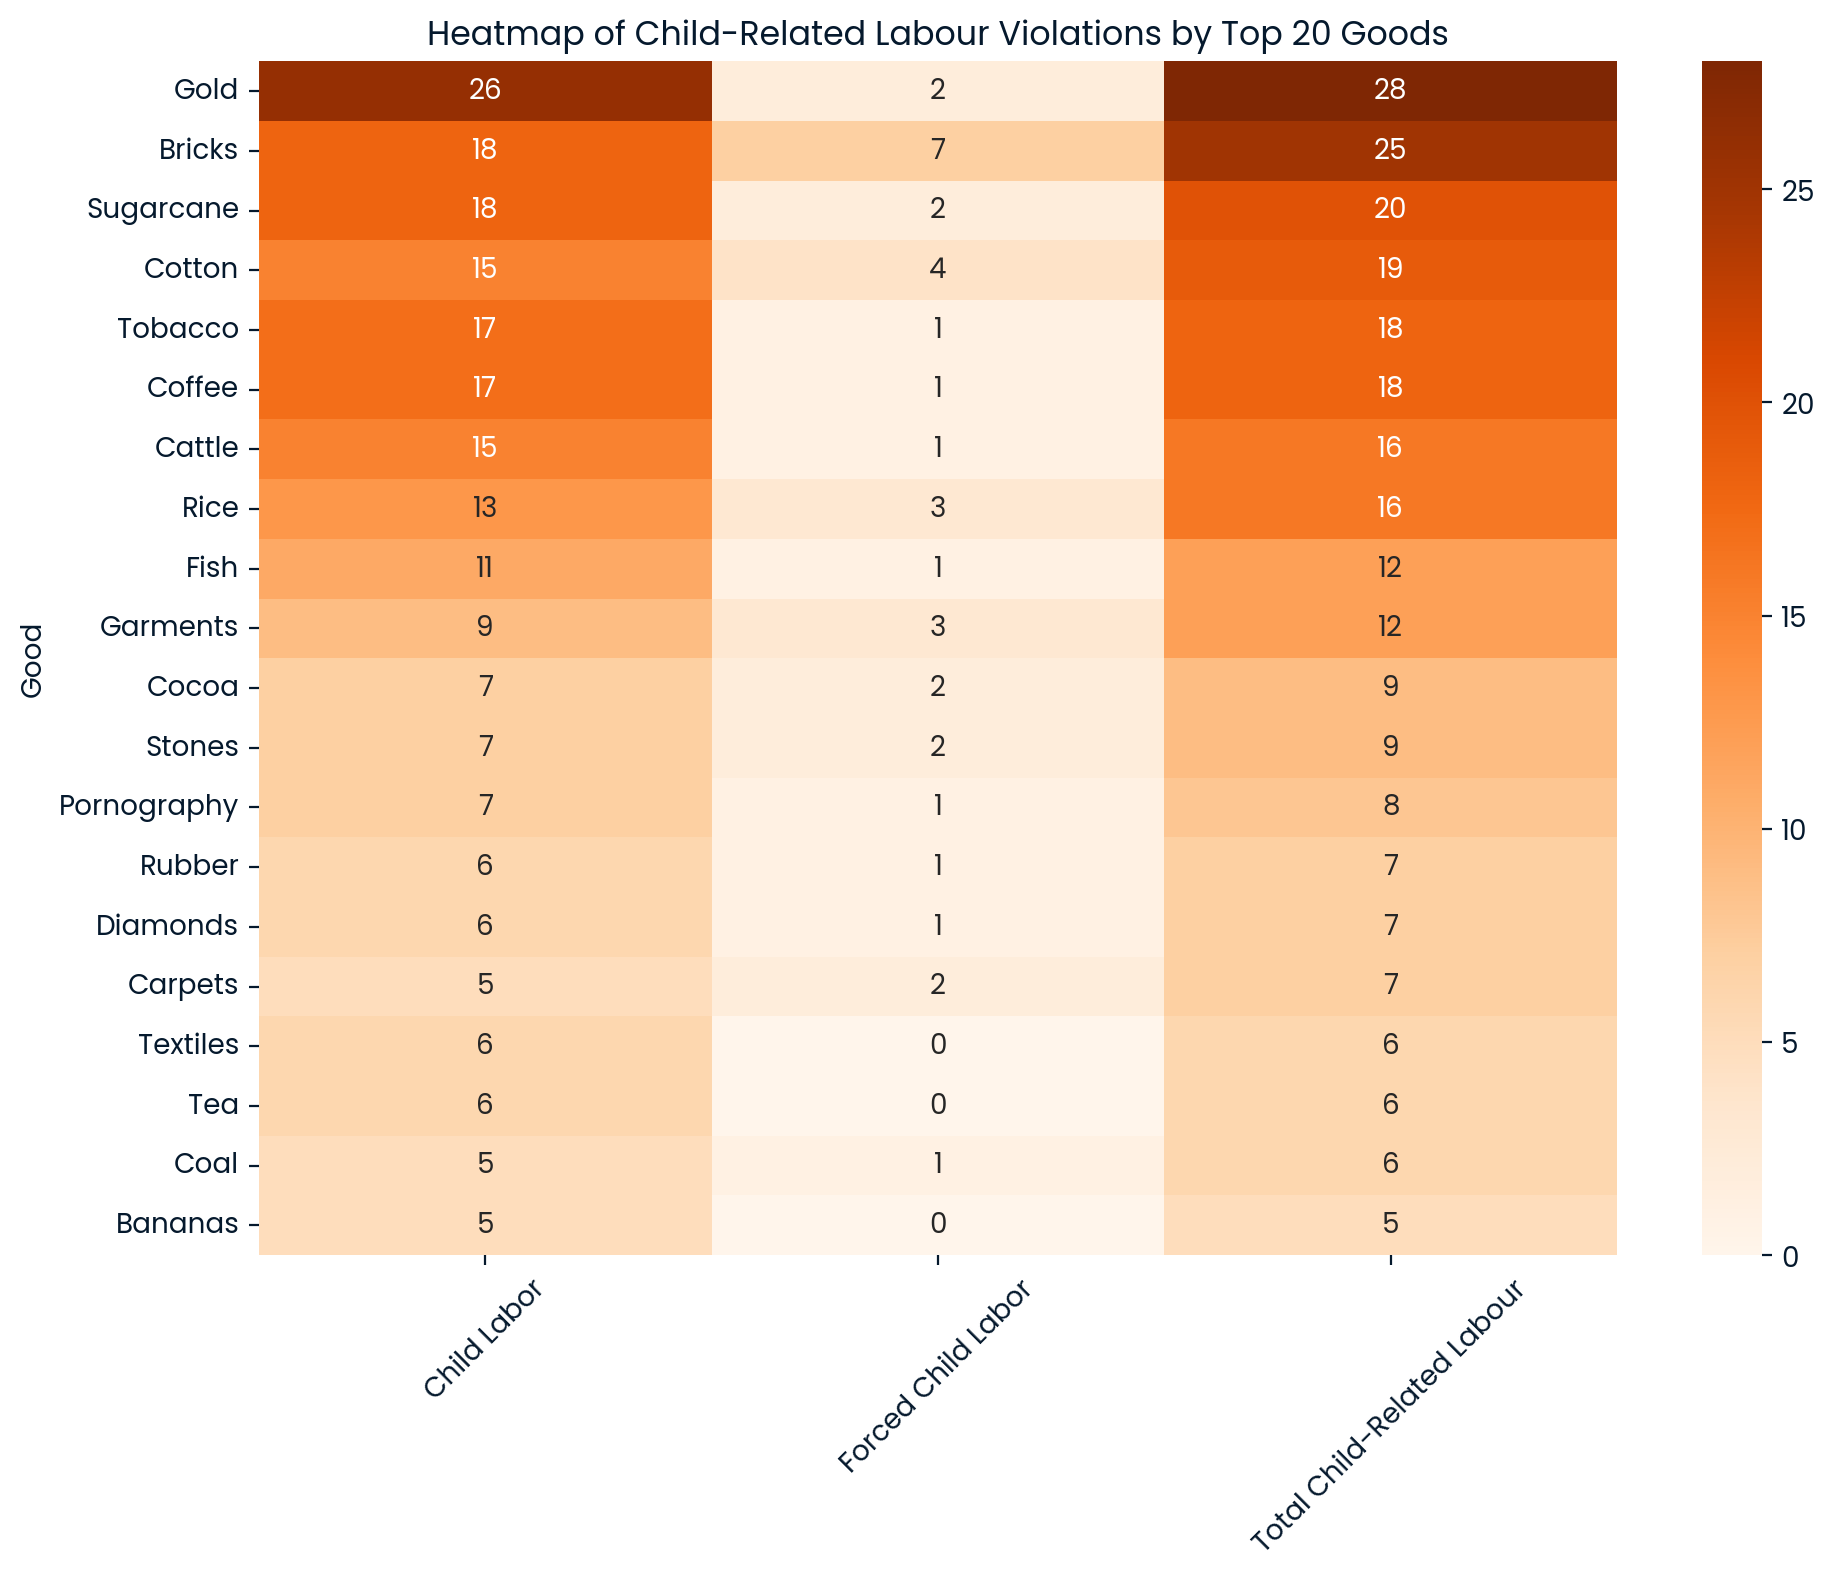

In [30]:
# Group by Good and sum relevant columns
child_related = goods.groupby('Good')[['Child Labor', 'Forced Child Labor']].sum()

# Create new column for total child-related labour
child_related['Total Child-Related Labour'] = child_related['Child Labor'] + child_related['Forced Child Labor']

# Sort by total child-related labour
child_related = child_related.sort_values(by='Total Child-Related Labour', ascending=False).head(20)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(child_related, annot=True, cmap='Oranges')
plt.title("Heatmap of Child-Related Labour Violations by Top 20 Goods")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
num_different_country = goods['Country/Area'].nunique()
print(f"There are {num_different_country} different countries")

There are 80 different countries


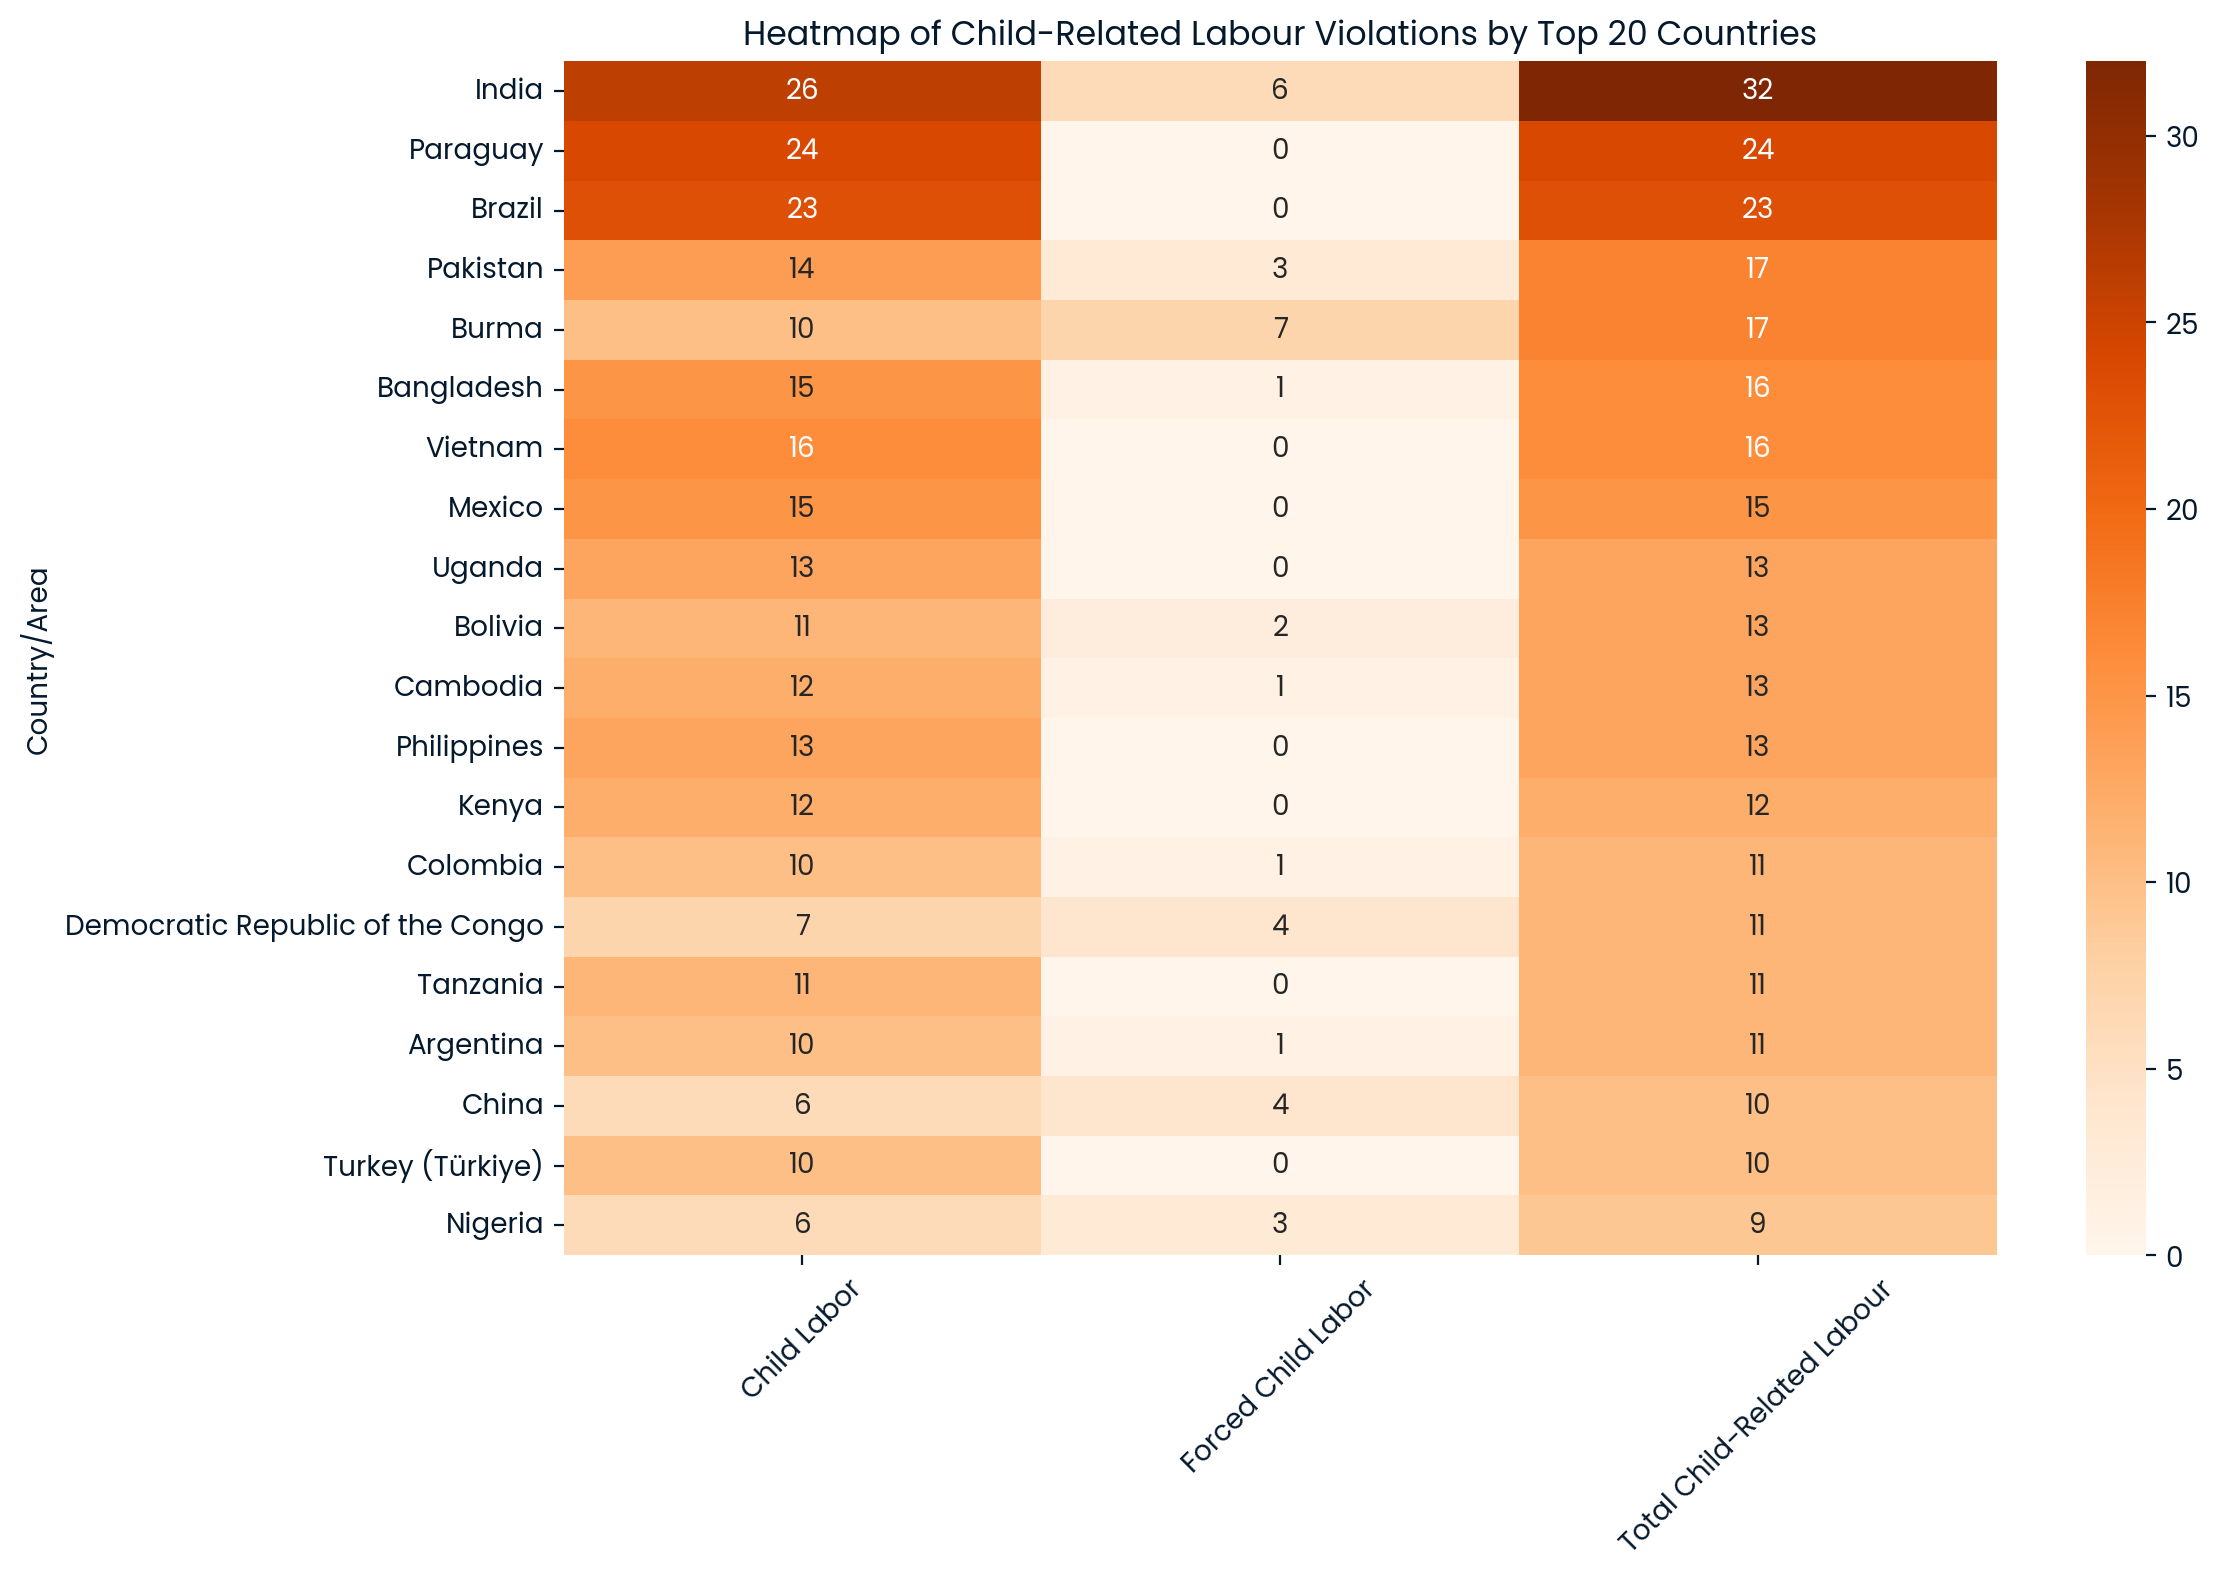

In [32]:
# Group by Country and sum child labour types
country_related = goods.groupby('Country/Area')[['Child Labor', 'Forced Child Labor']].sum()

# Add total child-related labour column
country_related['Total Child-Related Labour'] = (
    country_related['Child Labor'] + country_related['Forced Child Labor']
)

# Sort by total and take top 20 countries
country_related = country_related.sort_values(by='Total Child-Related Labour', ascending=False).head(20)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_related, annot=True, cmap='Oranges')
plt.title("Heatmap of Child-Related Labour Violations by Top 20 Countries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Downstream Dataset

In [33]:
num_different_downstream_goods = downstream['TVPRA Downstream Good'].nunique()
print(f"There are {num_different_downstream_goods} different downstream goods")

There are 42 different downstream goods


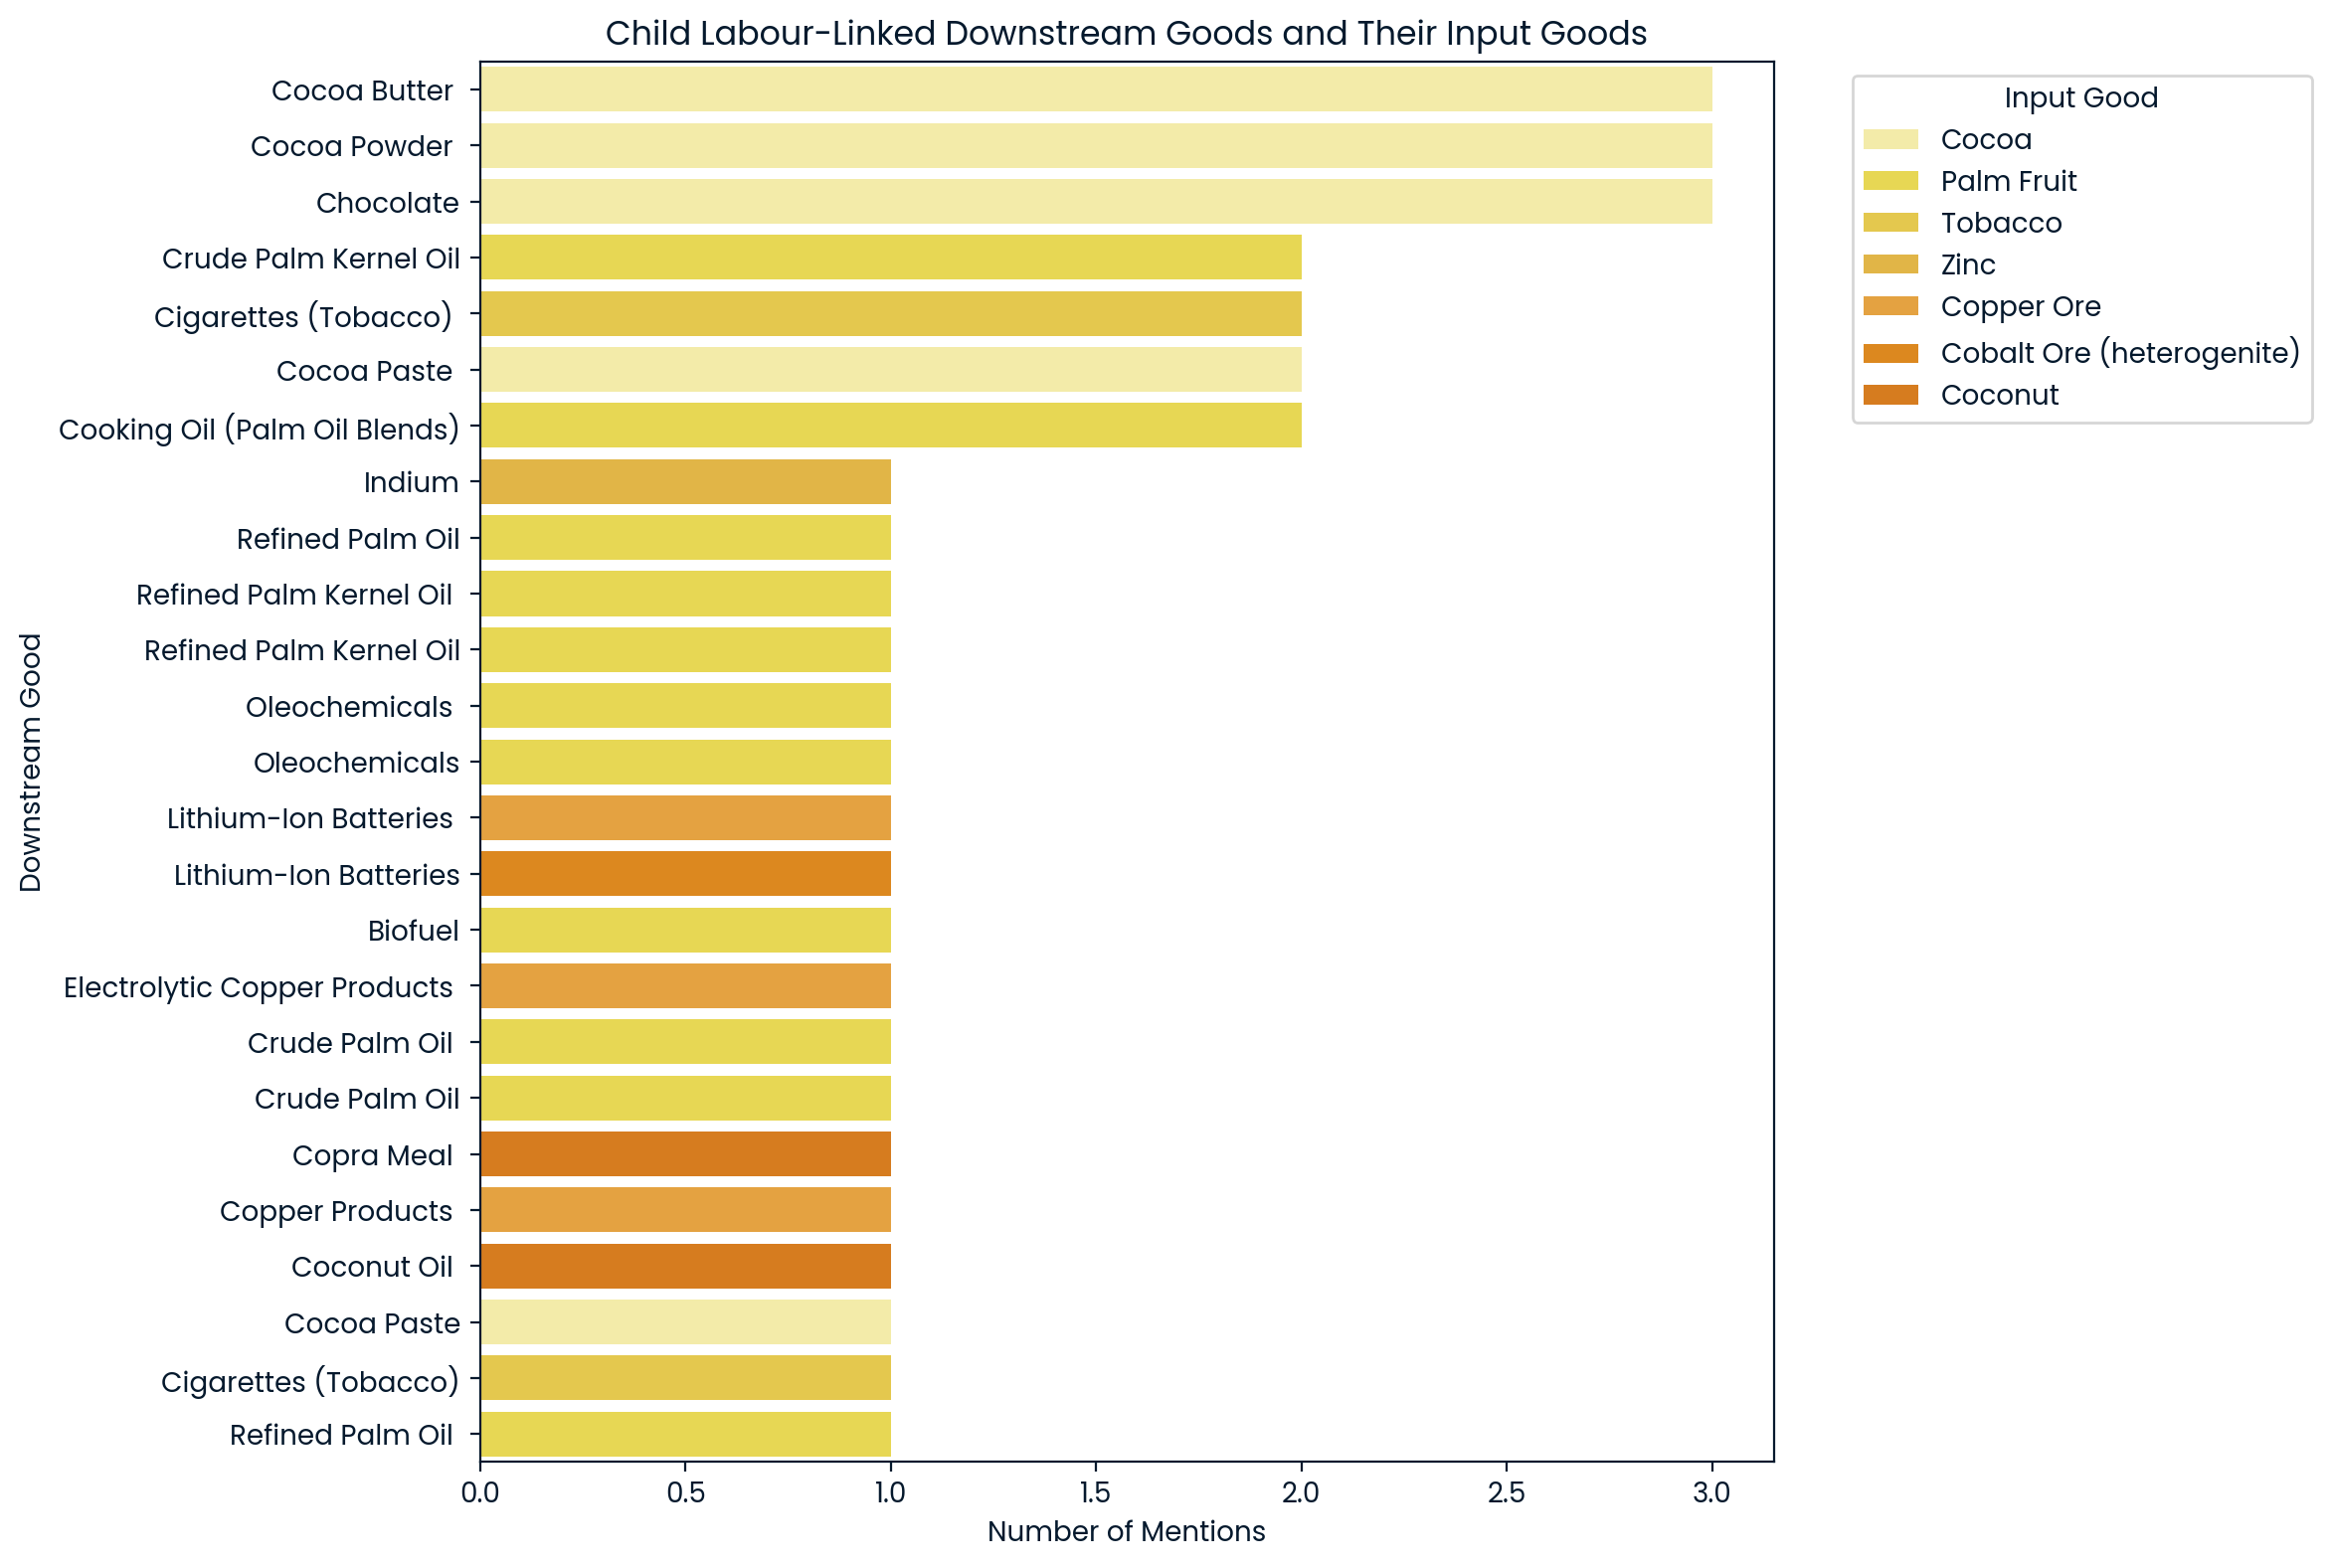

In [34]:
# Filter and clean
child_labour_downstream = downstream[downstream['Child Labor'] == 1]
child_labour_downstream = child_labour_downstream.dropna(subset=['TVPRA Downstream Good', 'TVPRA Input Good'])

# Group and sort
grouped = child_labour_downstream.groupby(
    ['TVPRA Downstream Good', 'TVPRA Input Good']
).size().reset_index(name='count')
grouped = grouped.sort_values(by='count', ascending=False)

# Define custom colours
custom_colours = [
    '#FFF59D', '#FFEB3B', '#FDD835', '#FBC02D', '#FFA726', '#FB8C00', '#F57C00', '#E65100', '#BF360C'
]

input_goods = grouped['TVPRA Input Good'].unique()
colour_cycle = cycle(custom_colours)
custom_palette = {good: next(colour_cycle) for good in input_goods}

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=grouped,
    y='TVPRA Downstream Good',
    x='count',
    hue='TVPRA Input Good',
    dodge=False,
    palette=custom_palette
)
plt.title('Child Labour-Linked Downstream Goods and Their Input Goods')
plt.xlabel('Number of Mentions')
plt.ylabel('Downstream Good')
plt.legend(title='Input Good', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [35]:
num_different_country = downstream['Country/Area'].nunique()
print(f"There are {num_different_country} different countries")

There are 16 different countries


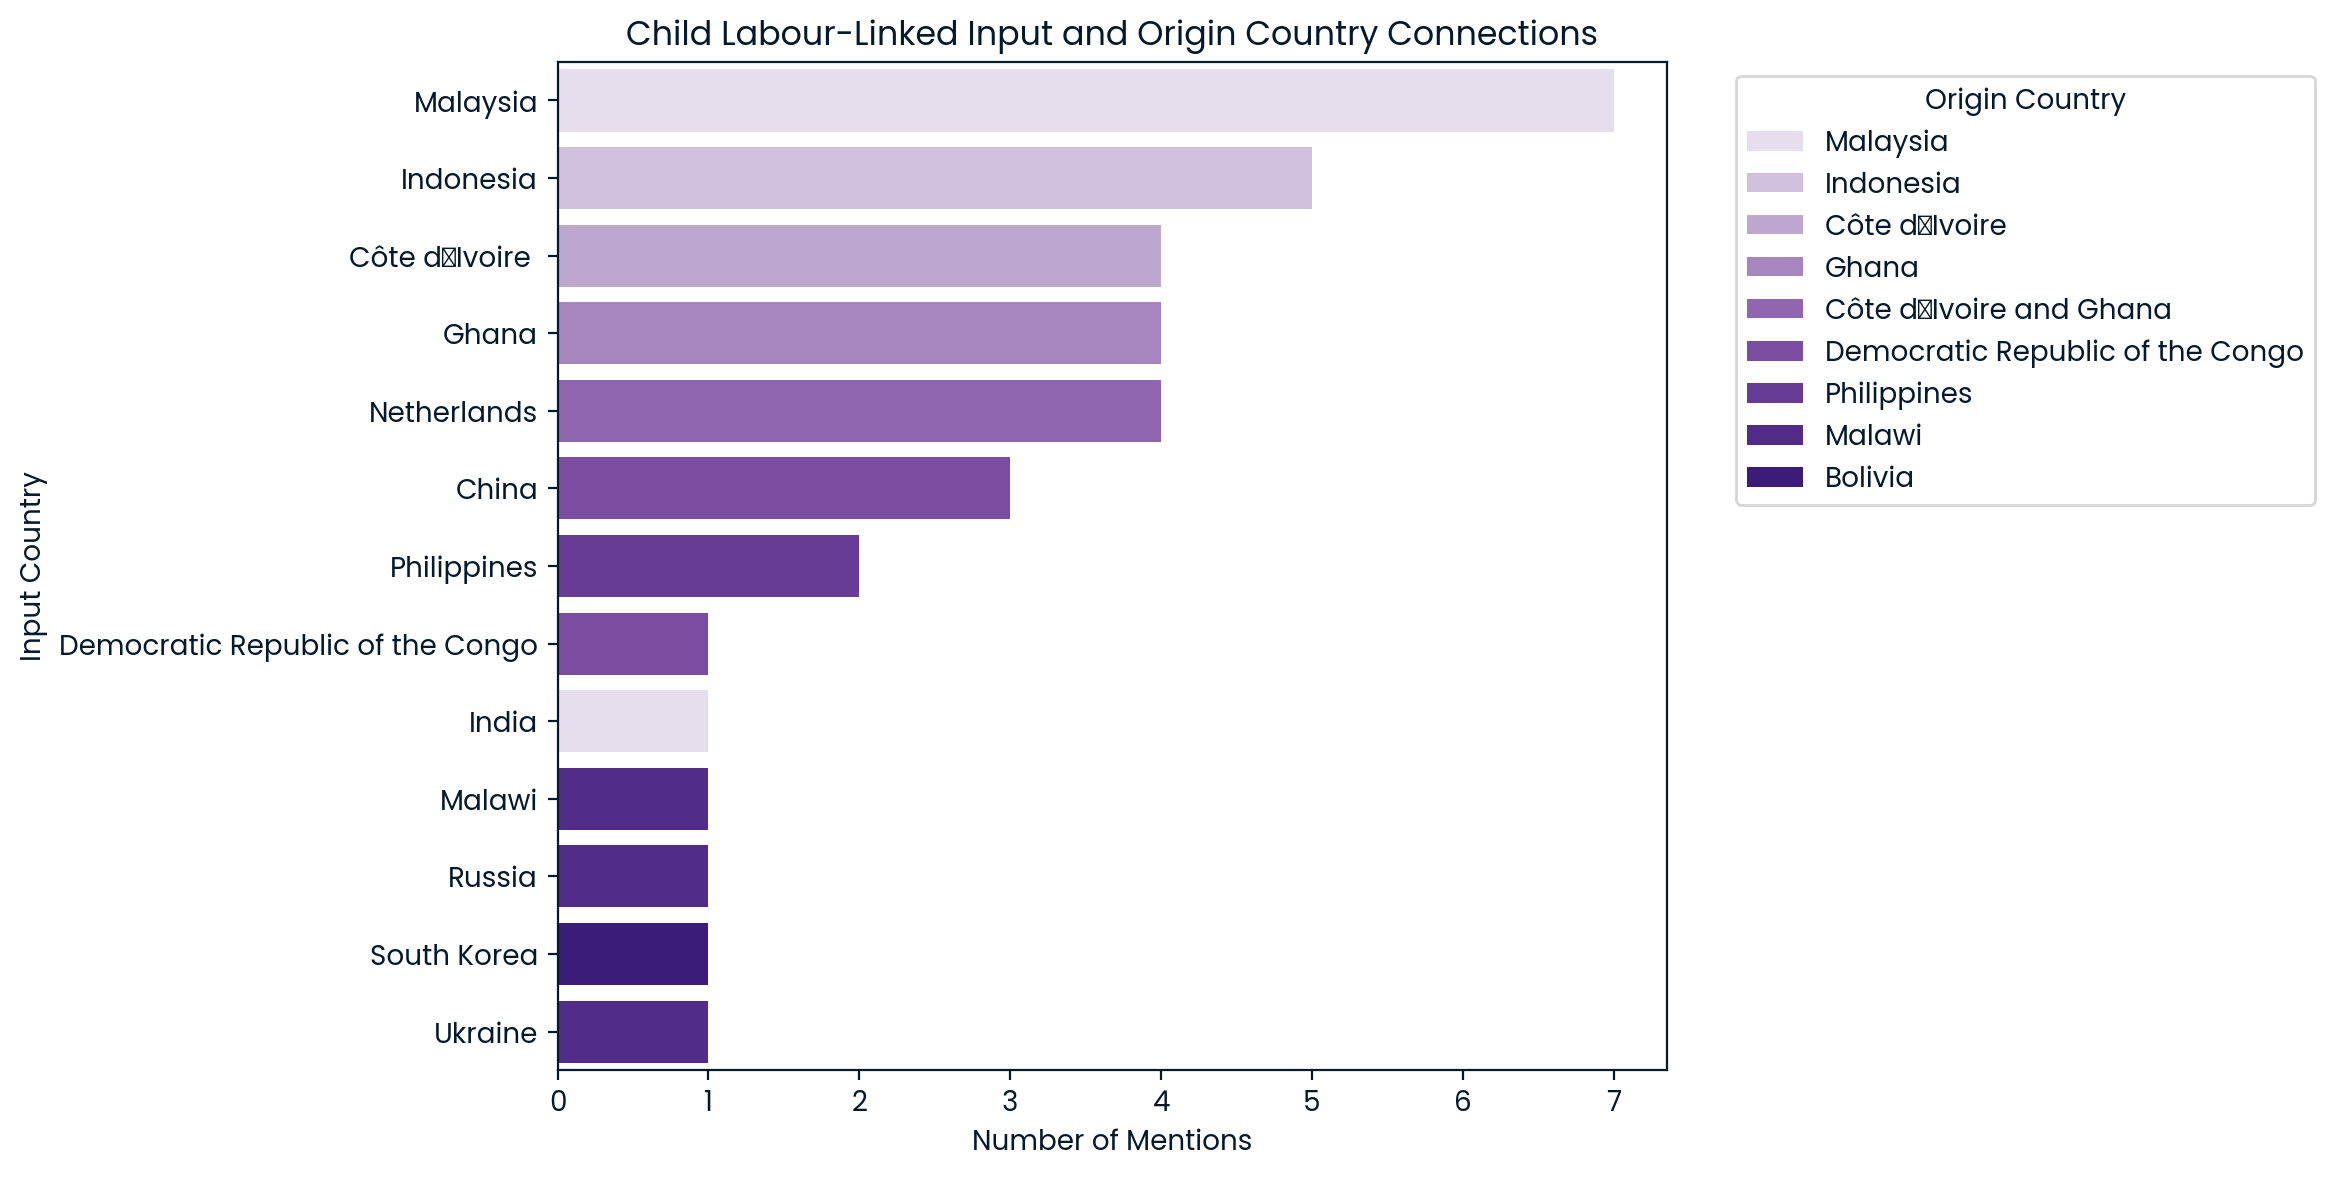

In [36]:
# Filter for child labour rows
child_labour = downstream[downstream['Child Labor'] == 1]

# Group by origin and input countries
country_links = child_labour.groupby(
    ['Country/Area', 'Origin Country/Area']
).size().reset_index(name='count')

# Sort by frequency
country_links = country_links.sort_values(by='count', ascending=False)

# Define custom colours
custom_palette = [
    '#E6DAF0', '#D1BCE3', '#BFA0D6', '#A87DC9', '#9359BD', '#7C3FAF', '#652DA3', '#4E1C97', '#370C89'
]

origin_countries = country_links['Origin Country/Area'].unique()
palette = {origin: color for origin, color in zip(origin_countries, cycle(custom_palette))}

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=country_links,
    y='Country/Area',
    x='count',
    hue='Origin Country/Area',
    dodge=False,
    palette=palette
)

plt.title('Child Labour-Linked Input and Origin Country Connections')
plt.xlabel('Number of Mentions')
plt.ylabel('Input Country')
plt.legend(title='Origin Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

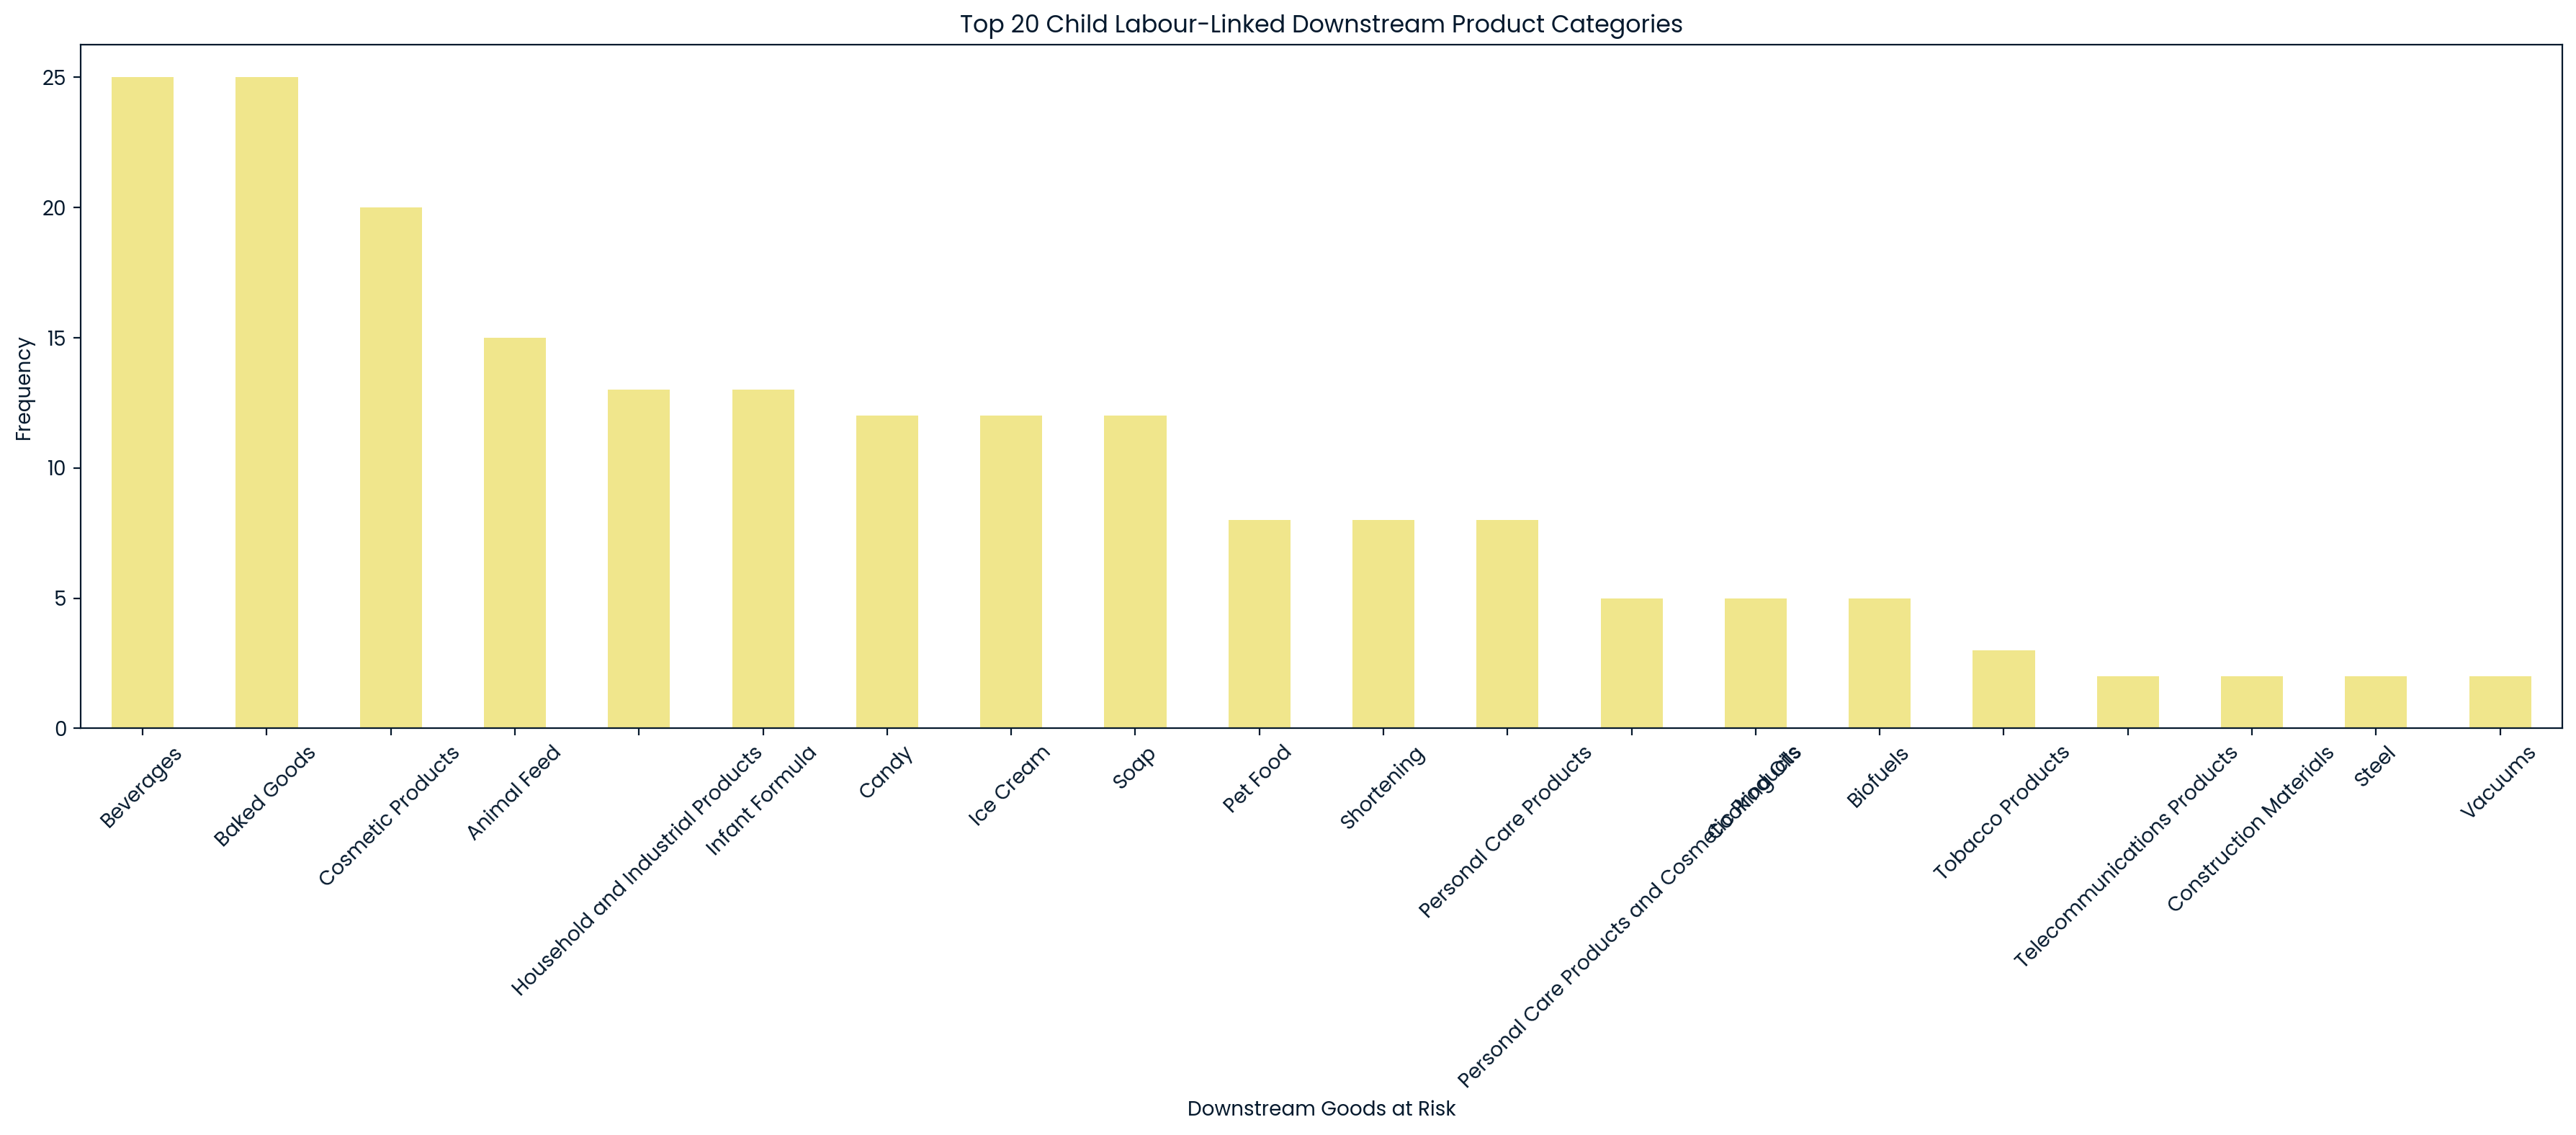

In [37]:
# Filter only rows where child labour is confirmed
risk_goods = downstream[downstream['Child Labor'] == 1]['Downstream Goods at Risk'].dropna()

# Split each entry into a list of goods
risk_goods_split = risk_goods.str.split(',')

# Remove extra whitespace and flatten the list
risk_flat = risk_goods_split.explode().str.strip()

# Count the most common downstream product categories (where child labour is present)
risk_counts = risk_flat.value_counts()

# Plot top 20 downstream applications at risk (with confirmed child labour)
plt.figure(figsize=(18, 8))
risk_counts.head(20).plot(kind='bar', color='khaki')
plt.title('Top 20 Child Labour-Linked Downstream Product Categories')
plt.xlabel('Downstream Goods at Risk')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Documents Dataset

Get the n most common words

In [38]:
# Combine all the lemmatized text into a single string
all_text = ' '.join([' '.join(text) if isinstance(text, list) else text for text in gov_docs['lemmatized_text'].dropna()])

# Split the text into words
words = all_text.split()

<Figure size 1000x600 with 0 Axes>

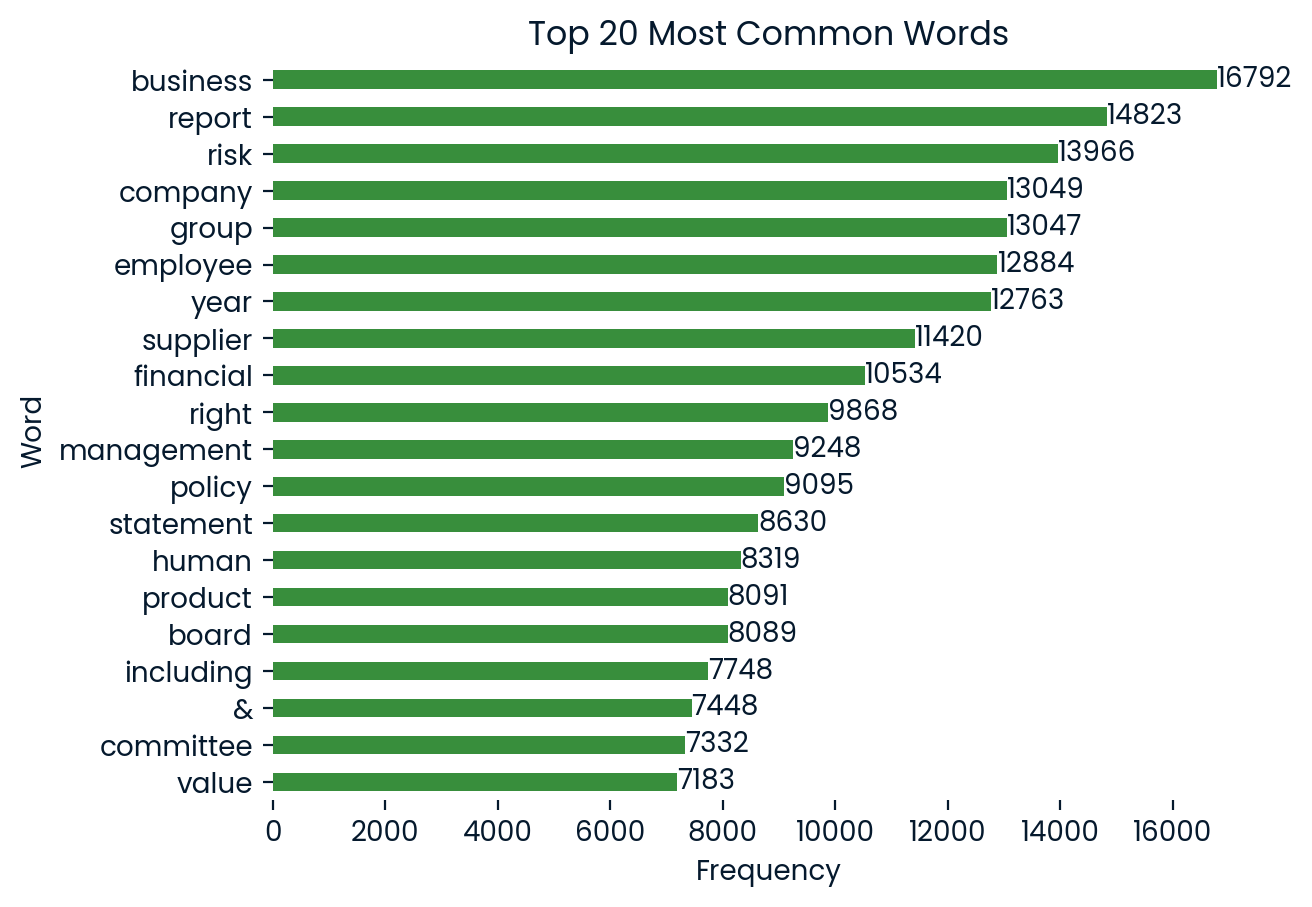

In [39]:
# Count the frequency of each word
word_counts = Counter(words)

# Get the 20 most common words
common_words = word_counts.most_common(20)

# Convert to DataFrame for easier plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Sort the DataFrame by Frequency in ascending order for horizontal bars
common_words_df = common_words_df.sort_values(by='Frequency', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
ax = common_words_df.plot(
    kind='barh',
    x='Word',
    y='Frequency',
    legend=False,
    color='#388E3C'
)

plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add data labels
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()


In [40]:
# Join tokens into a string per document
gov_docs['lemmatized_text_str'] = gov_docs['lemmatized_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(gov_docs['lemmatized_text_str'])

# Top terms
vectorizer.get_feature_names_out()


array(['board', 'business', 'committee', 'company', 'employee',
       'financial', 'group', 'human', 'including', 'management',
       'performance', 'policy', 'product', 'report', 'right', 'risk',
       'statement', 'supplier', 'value', 'year'], dtype=object)

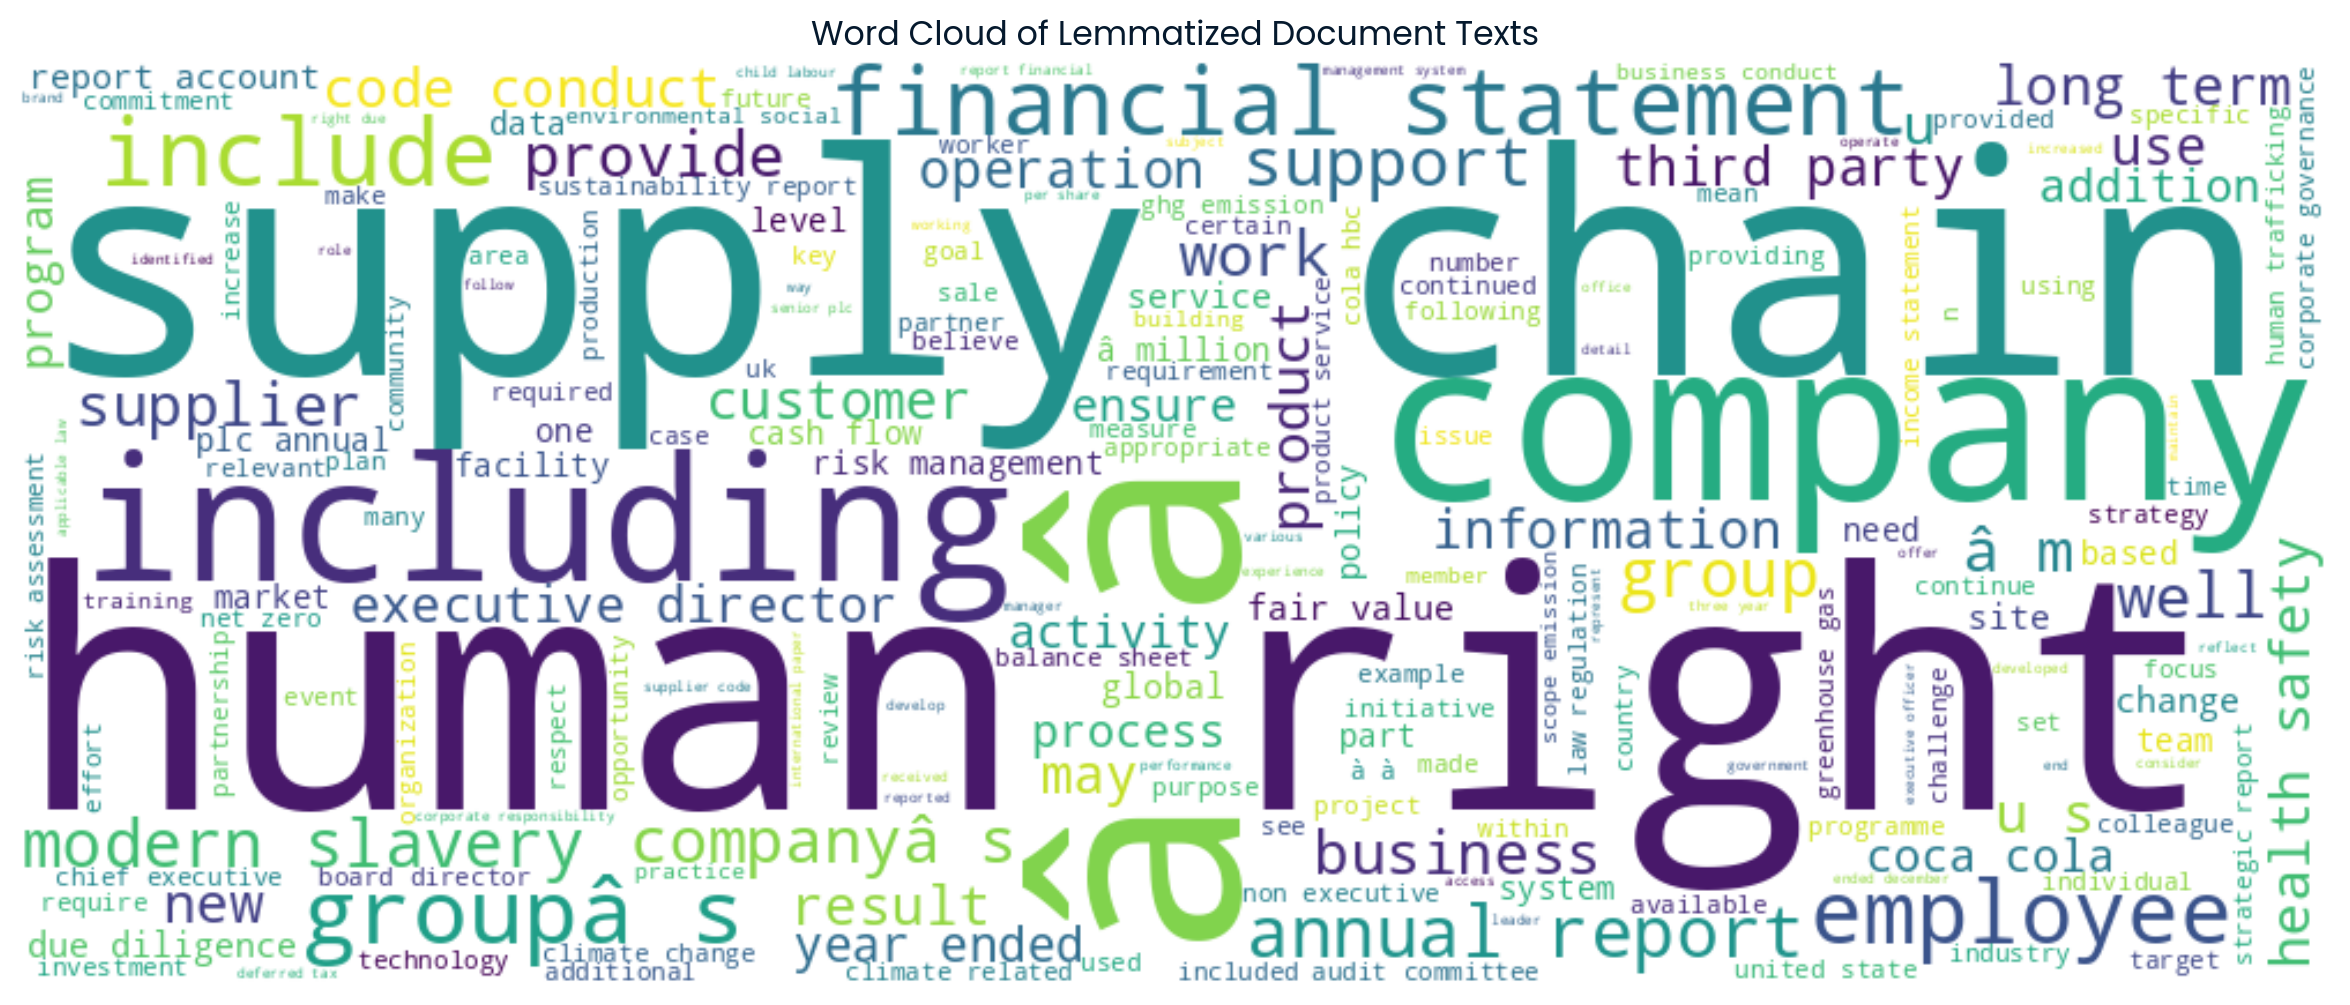

In [41]:
all_words = [word for tokens in gov_docs['lemmatized_text'] for word in tokens if isinstance(tokens, list)] 

wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(' '.join(words))

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lemmatized Document Texts')
plt.show()

In [42]:
# Detect mentions of specific labour types in each document
gov_docs['mentions_child_labour'] = gov_docs['lemmatized_text'].apply(
    lambda tokens: 'child' in tokens and 'labour' in tokens
)

gov_docs['mentions_forced_labour'] = gov_docs['lemmatized_text'].apply(
    lambda tokens: 'forced' in tokens and 'labour' in tokens
)

gov_docs['mentions_forced_child_labour'] = gov_docs['lemmatized_text'].apply(
    lambda tokens: 'forced' in tokens and 'child' in tokens and 'labour' in tokens
)

# Summary of how many documents mention each term
gov_docs[['mentions_child_labour', 'mentions_forced_labour', 'mentions_forced_child_labour']].sum()

mentions_child_labour           178
mentions_forced_labour          155
mentions_forced_child_labour    155
dtype: int64

In [43]:
# Total number of unique companies in the dataset
print("There are", gov_docs['company_name'].nunique(), "unique companies in the dataset.")

There are 189 unique companies in the dataset.


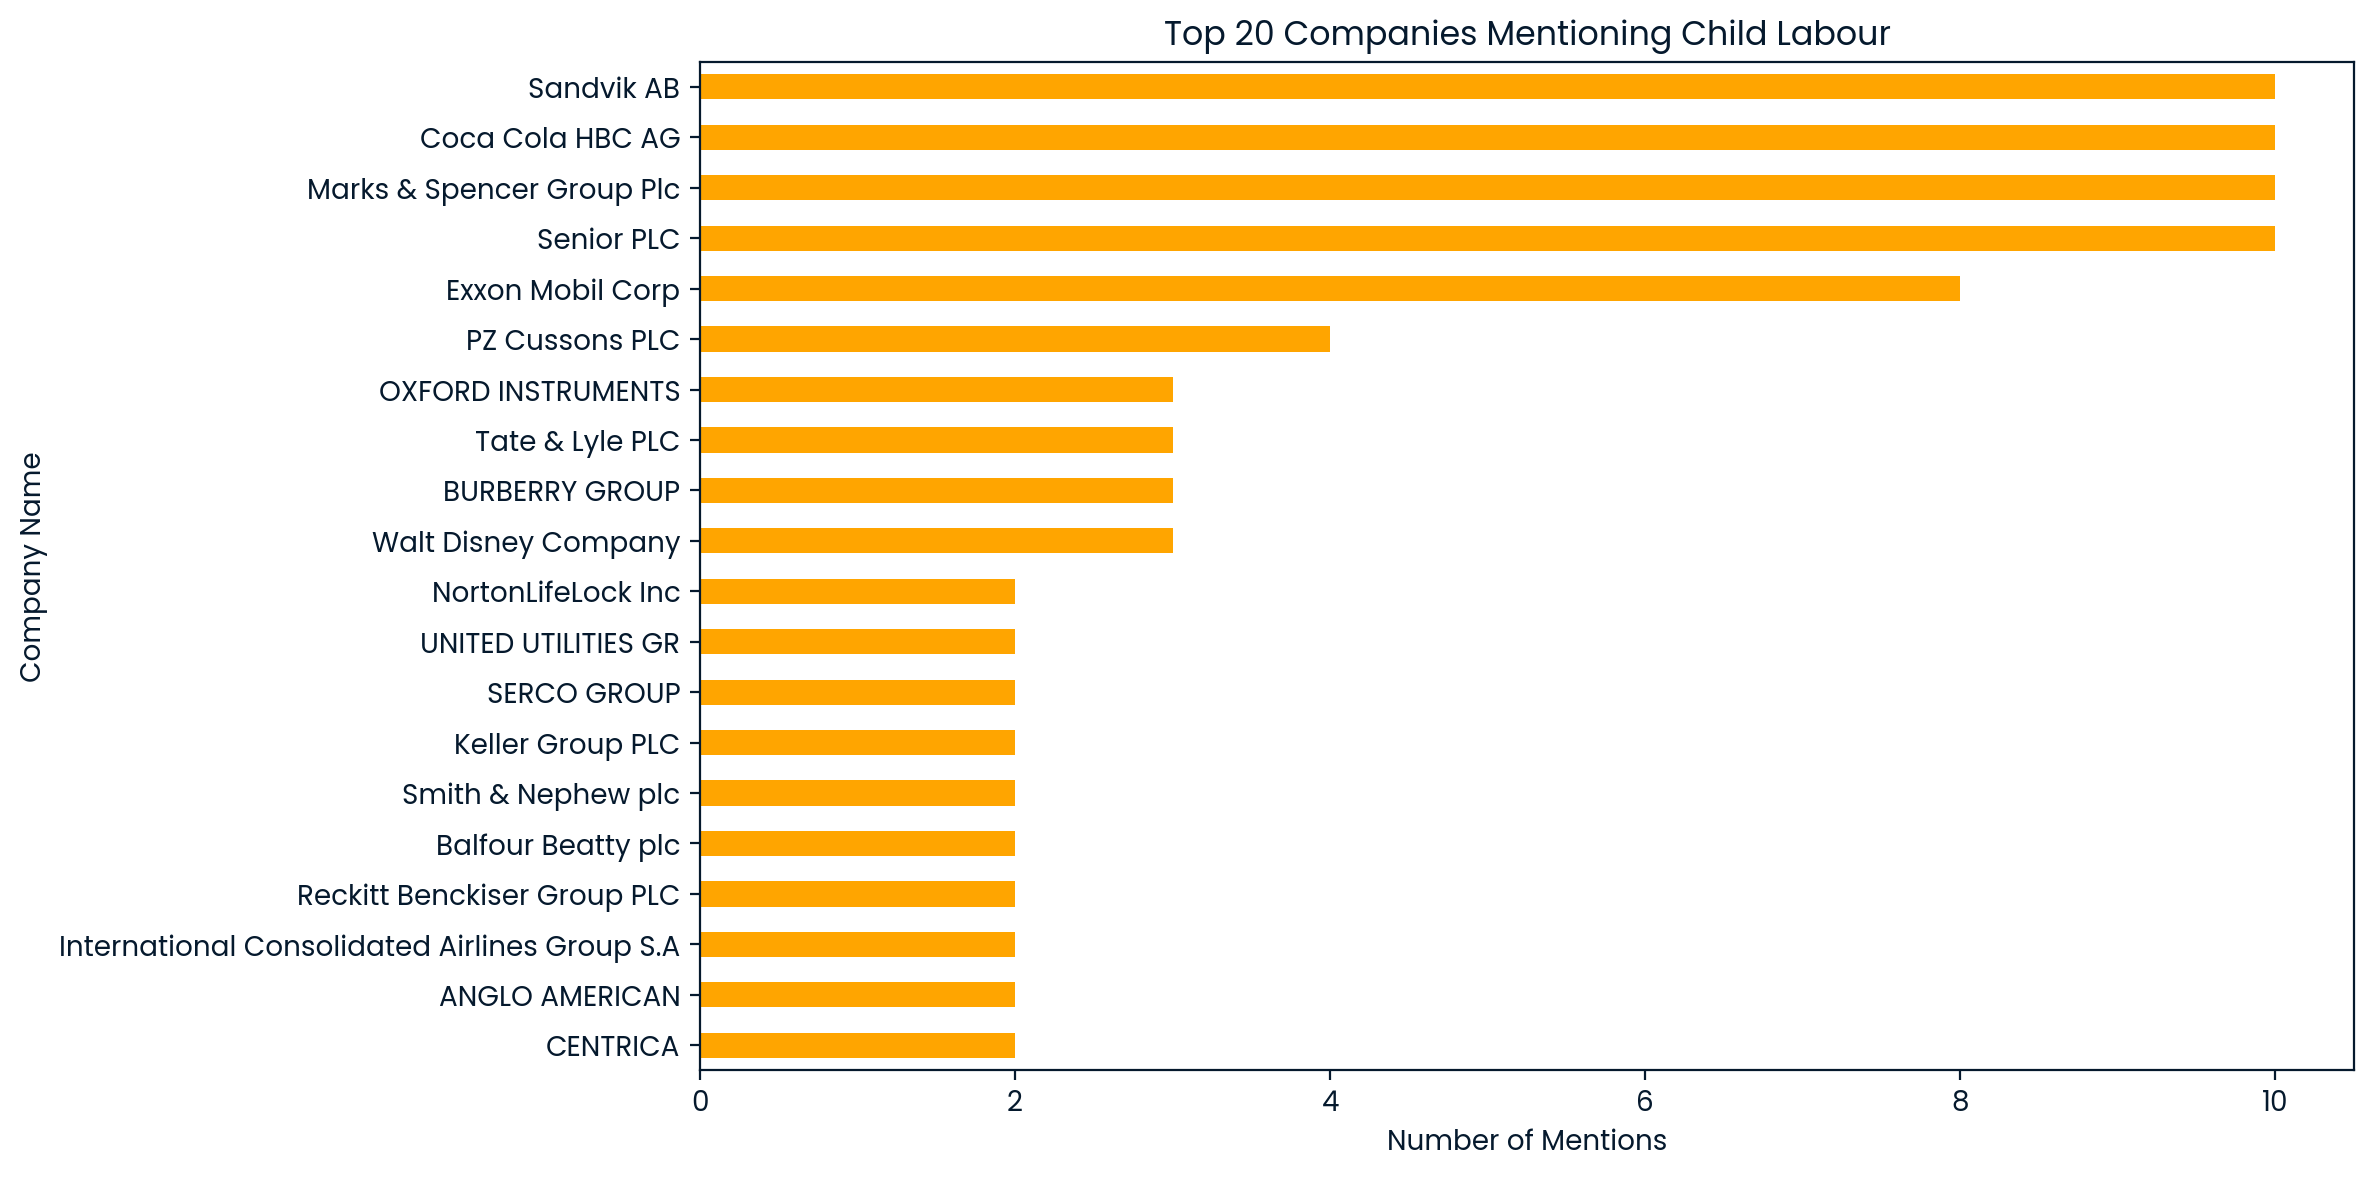

In [44]:
# Top 20 companies mentioning child labour

# Get top 20 companies mentioning child labour
top_companies = gov_docs[gov_docs['mentions_child_labour'] == True]['company_name'].value_counts().head(20)

# Plot
plt.figure(figsize=(12, 6))
top_companies.plot(kind='barh', color='orange')
plt.xlabel('Number of Mentions')
plt.ylabel('Company Name')
plt.title('Top 20 Companies Mentioning Child Labour')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()


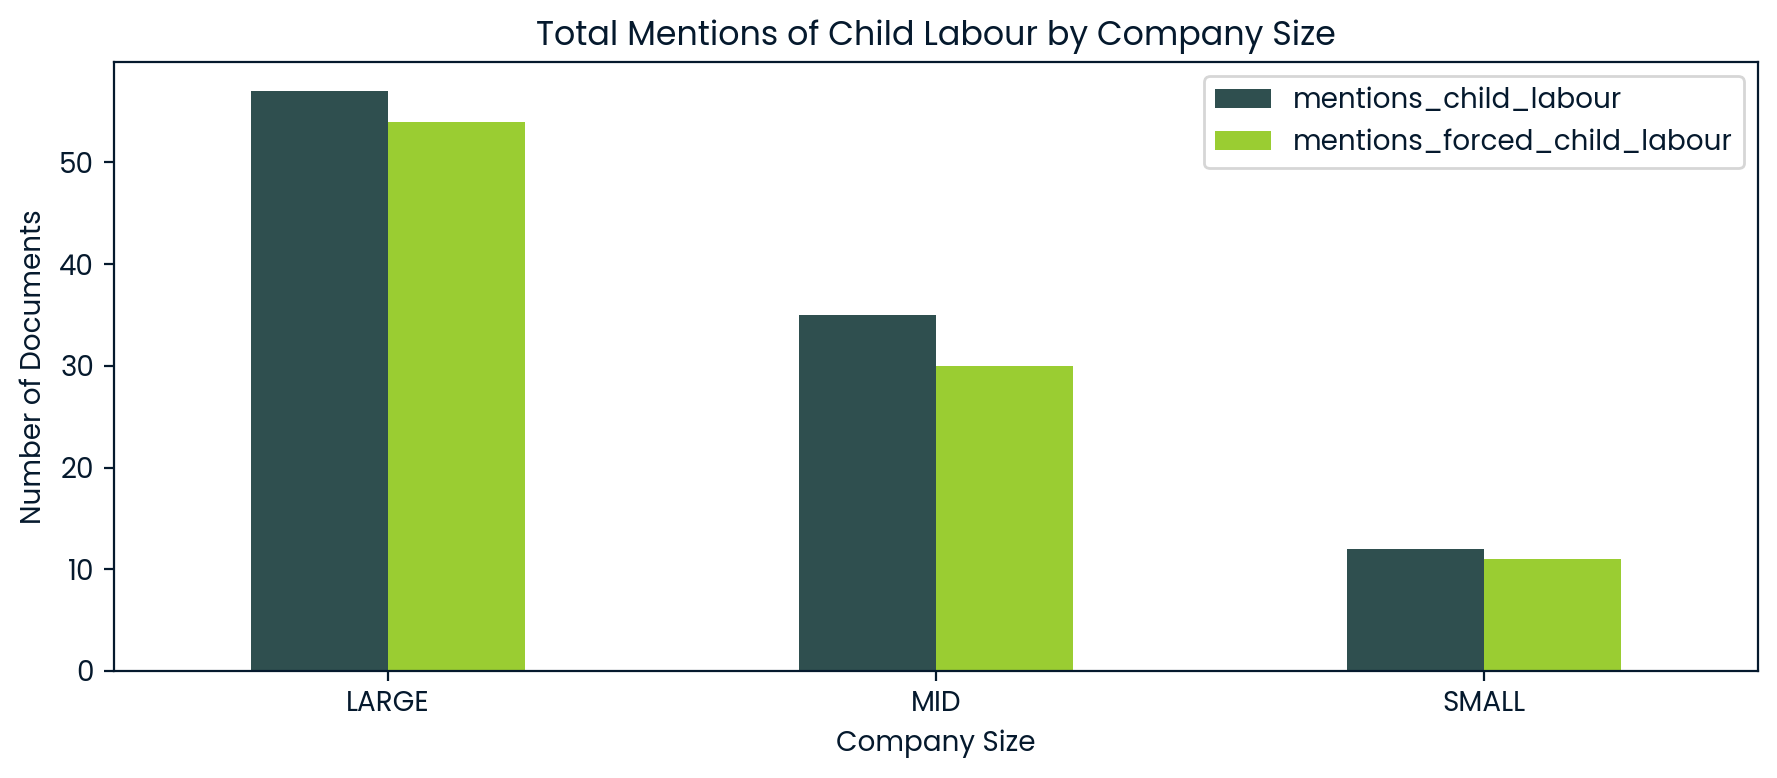

In [45]:
# Group by Company Size and sum the mentions
gov_docs.groupby('company_size')[['mentions_child_labour', 'mentions_forced_child_labour']].sum()

# Group and sum mentions
labour_counts = gov_docs.groupby('company_size')[['mentions_child_labour', 'mentions_forced_child_labour']].sum()

# Plot
labour_counts.plot(kind='bar', figsize=(9, 4), color=['darkslategrey', 'yellowgreen'])
plt.title('Total Mentions of Child Labour by Company Size')
plt.ylabel('Number of Documents')
plt.xlabel('Company Size')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

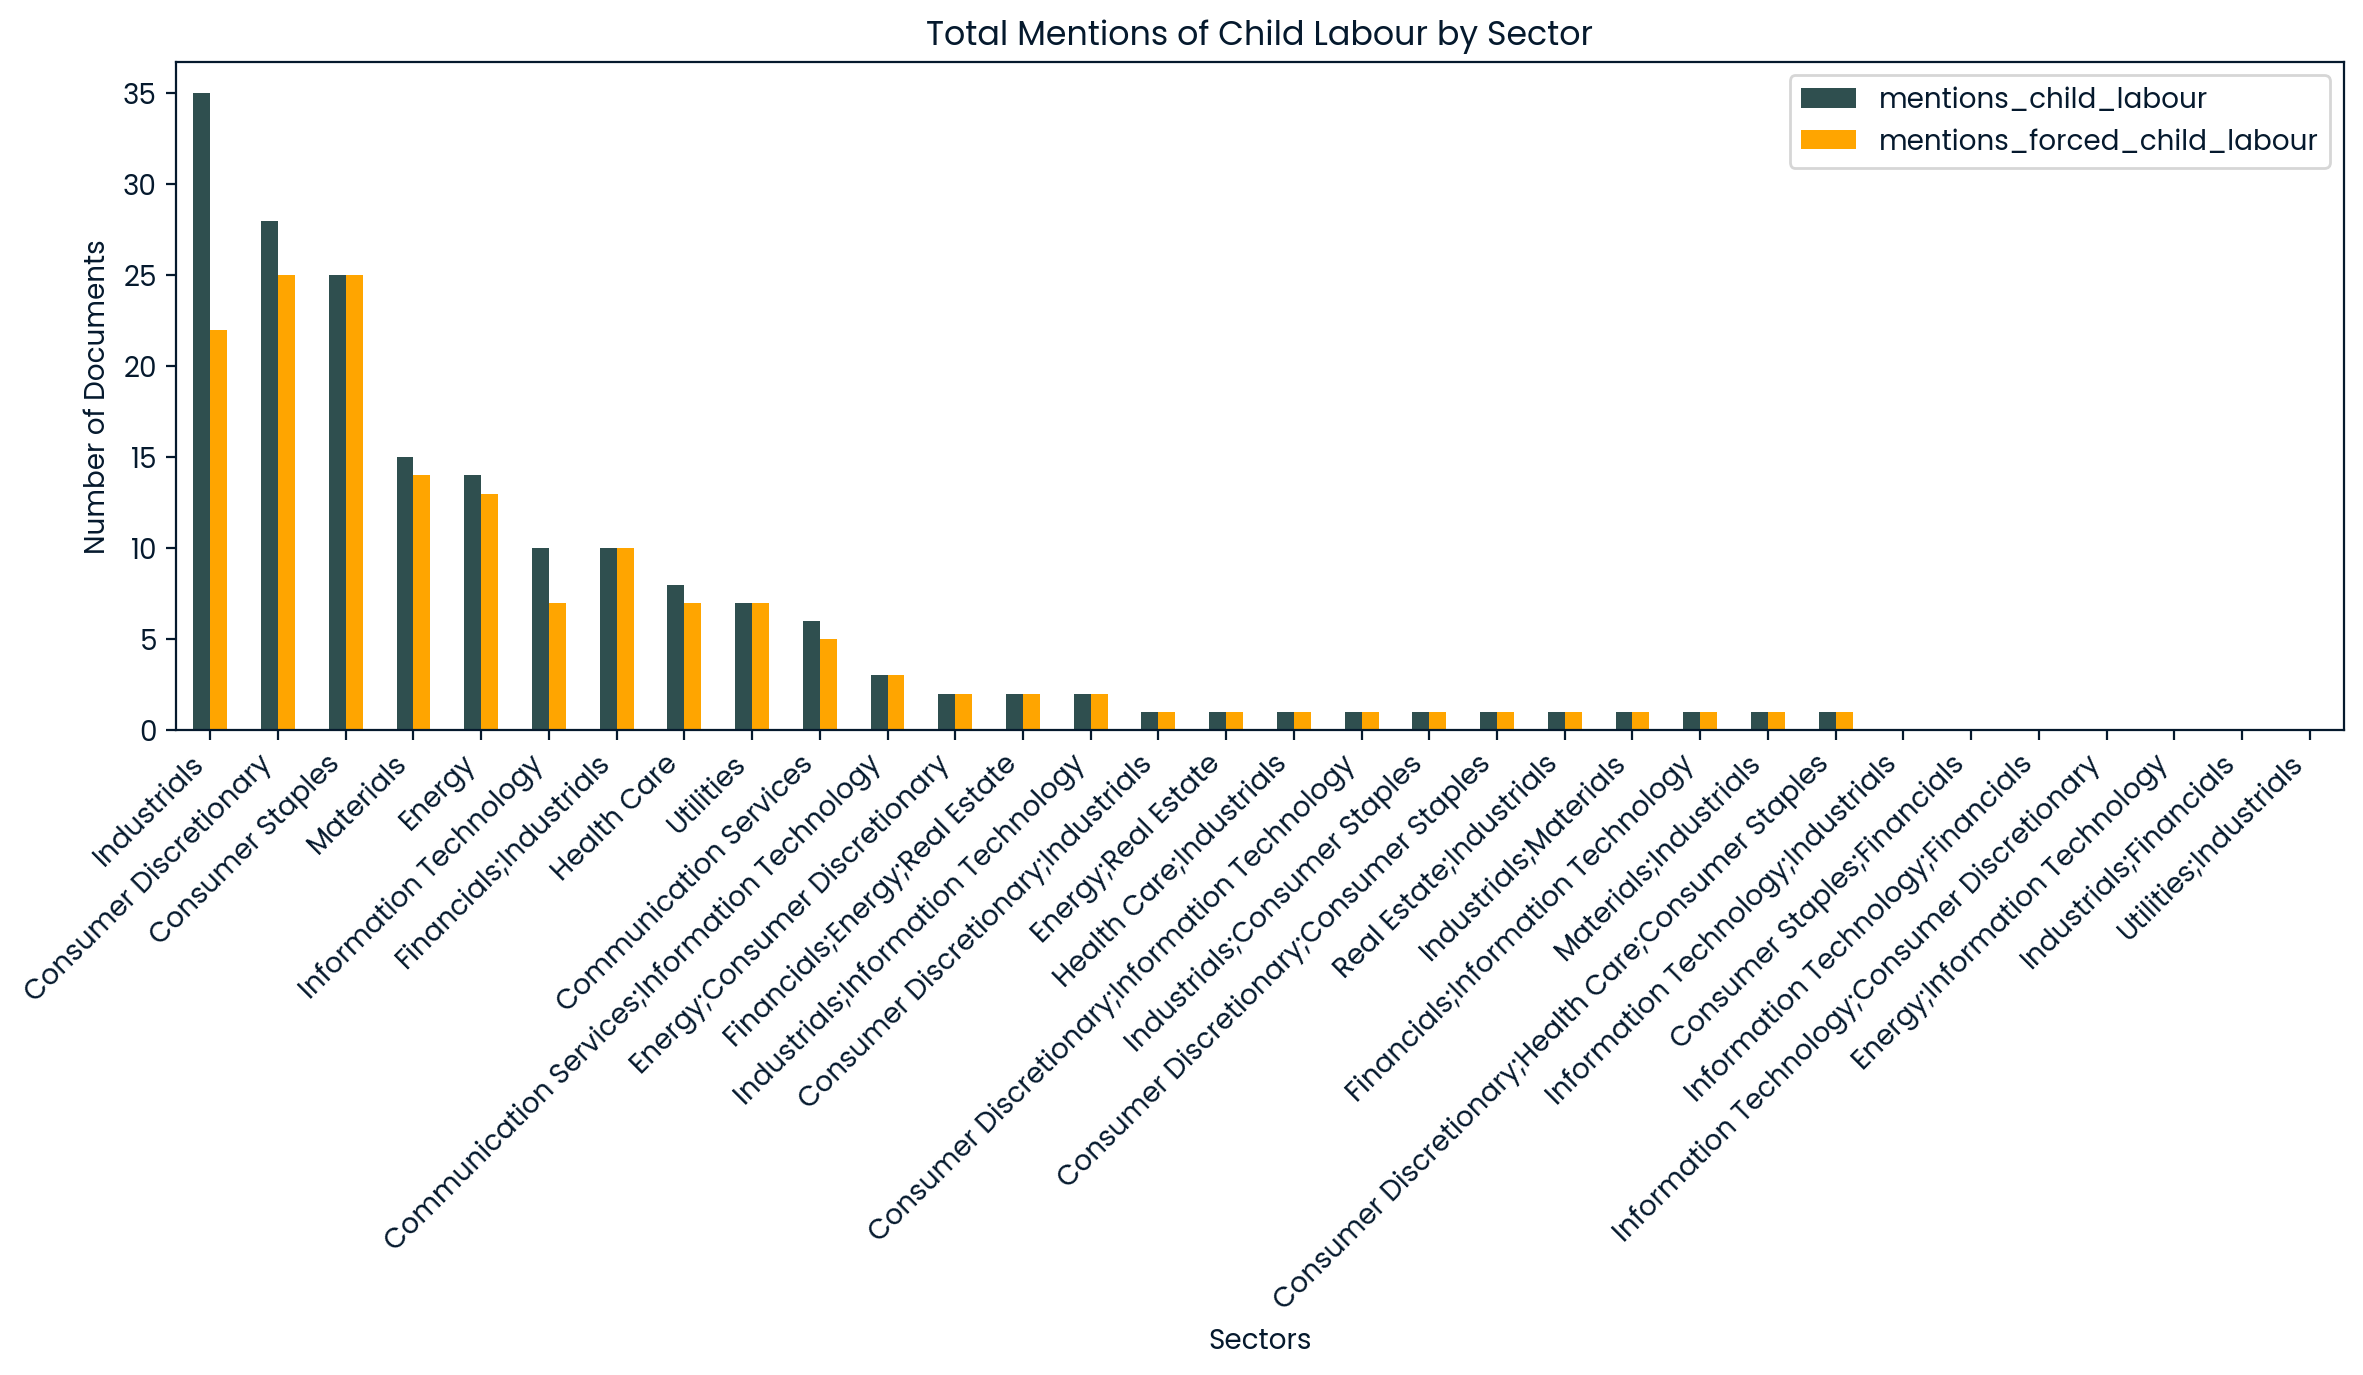

In [46]:
# Group by sector and sum the mentions
sector_mentions = gov_docs.groupby('sectors')[['mentions_child_labour', 'mentions_forced_child_labour']].sum()

# Sort by child labour mentions (you can also sort by forced child labour if preferred)
sector_mentions_sorted = sector_mentions.sort_values(by='mentions_child_labour', ascending=False)

# Plot the sorted data
sector_mentions_sorted.plot(kind='bar', figsize=(12, 7), color=['darkslategrey', 'orange'])
plt.title('Total Mentions of Child Labour by Sector')
plt.ylabel('Number of Documents')
plt.xlabel('Sectors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

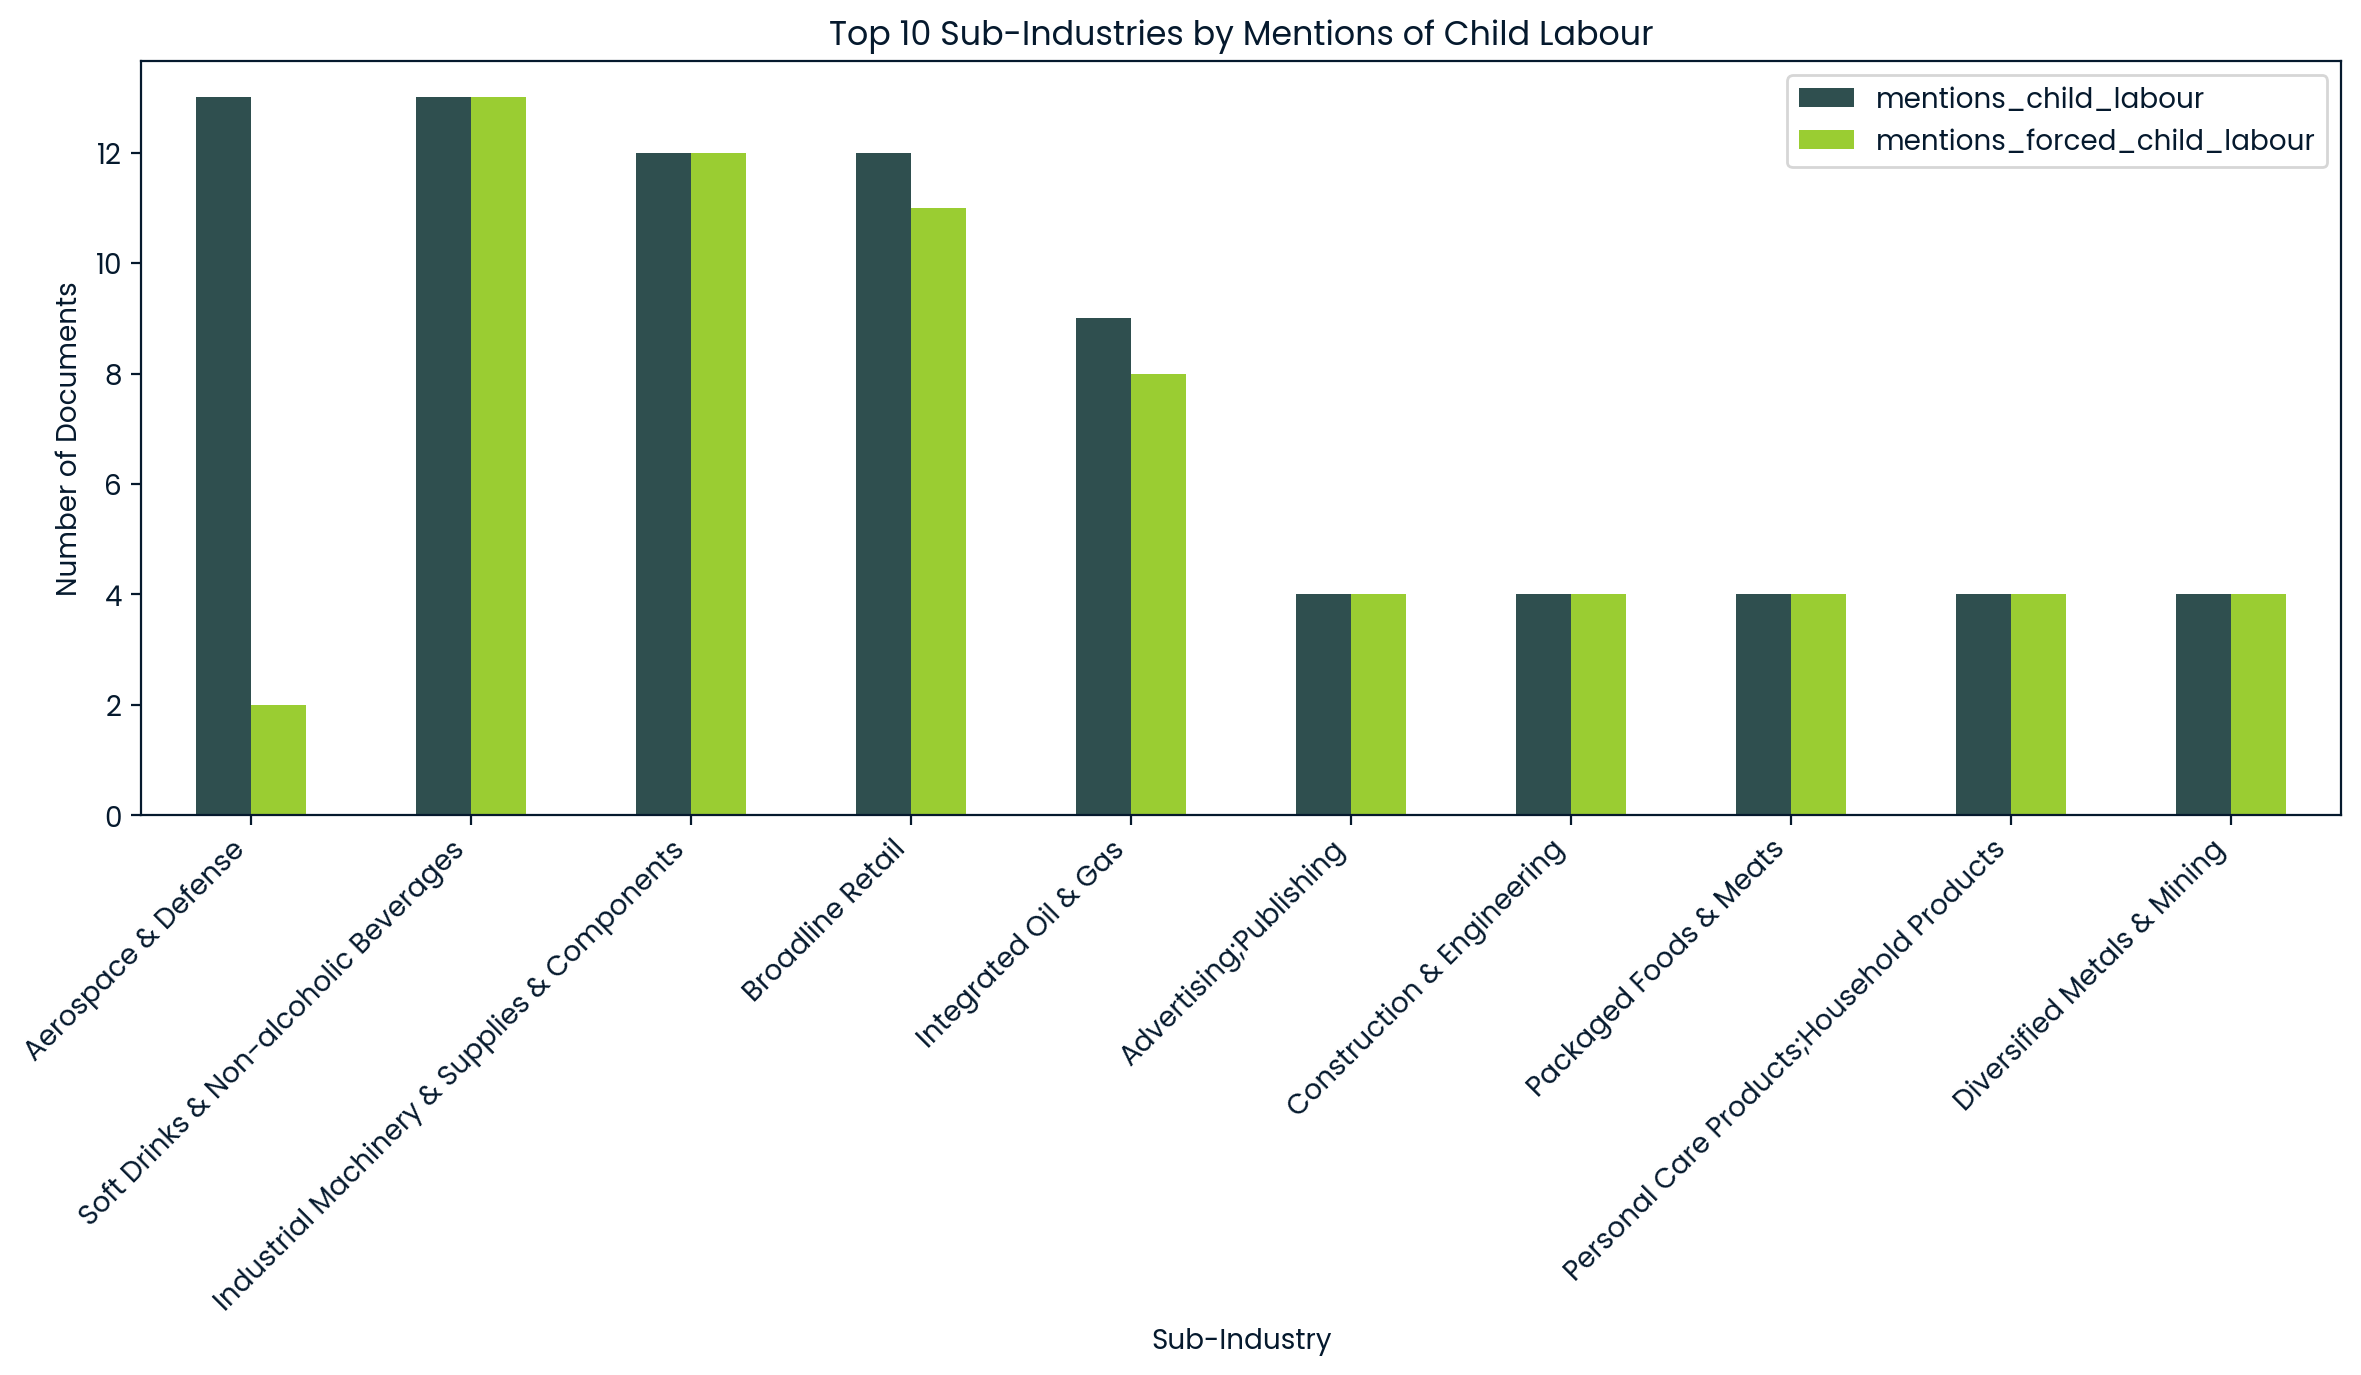

In [47]:
# Group by sub-industry and sum the mentions
subindustry_mentions = gov_docs.groupby('sub_industries')[['mentions_child_labour', 'mentions_forced_child_labour']].sum()

# Sort by mentions of child labour
subindustry_sorted = subindustry_mentions.sort_values(by='mentions_child_labour', ascending=False)

# Optional: show top 10
top_subindustries = subindustry_sorted.head(10)

# Plot
top_subindustries.plot(kind='bar', figsize=(12, 7), color=['darkslategrey', 'yellowgreen'])
plt.title('Top 10 Sub-Industries by Mentions of Child Labour')
plt.ylabel('Number of Documents')
plt.xlabel('Sub-Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()